# Table of Contents
 <p><div class="lev1"><a href="#Data-Wrangling-with-Pandas"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Wrangling with Pandas</a></div><div class="lev2"><a href="#Date/Time-data-handling"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Date/Time data handling</a></div><div class="lev2"><a href="#Merging-and-joining-DataFrame-objects"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Merging and joining DataFrame objects</a></div><div class="lev2"><a href="#Concatenation"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Concatenation</a></div><div class="lev2"><a href="#Exercise"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Exercise</a></div><div class="lev2"><a href="#Reshaping-DataFrame-objects"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Reshaping DataFrame objects</a></div><div class="lev2"><a href="#Pivoting"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Pivoting</a></div><div class="lev2"><a href="#Data-transformation"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Data transformation</a></div><div class="lev3"><a href="#Dealing-with-duplicates"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Dealing with duplicates</a></div><div class="lev3"><a href="#Value-replacement"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Value replacement</a></div><div class="lev3"><a href="#Inidcator-variables"><span class="toc-item-num">1.7.3&nbsp;&nbsp;</span>Inidcator variables</a></div><div class="lev2"><a href="#Categorical-Data"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Categorical Data</a></div><div class="lev3"><a href="#Discretization"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Discretization</a></div><div class="lev3"><a href="#Permutation-and-sampling"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>Permutation and sampling</a></div><div class="lev2"><a href="#Data-aggregation-and-GroupBy-operations"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Data aggregation and GroupBy operations</a></div><div class="lev3"><a href="#Apply"><span class="toc-item-num">1.9.1&nbsp;&nbsp;</span>Apply</a></div><div class="lev2"><a href="#Exercise"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Exercise</a></div><div class="lev2"><a href="#References"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>References</a></div>

# Data Wrangling with Pandas

Now that we have been exposed to the basic functionality of Pandas, lets explore some more advanced features that will be useful when addressing more complex data management tasks.

As most statisticians/data analysts will admit, often the lion's share of the time spent implementing an analysis is devoted to preparing the data itself, rather than to coding or running a particular model that uses the data. This is where Pandas and  Python's standard library are beneficial, providing high-level, flexible, and efficient tools for manipulating your data as needed.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
pd.options.mode.chained_assignment = None  # default='warn'

## Date/Time data handling

Date and time data are inherently problematic. There are an unequal number of days in every month, an unequal number of days in a year (due to leap years), and time zones that vary over space. Yet information about time is essential in many analyses, particularly in the case of time series analysis.

The `datetime` built-in library handles temporal information down to the nanosecond.

In [2]:
from datetime import datetime


In [3]:
now = datetime.now()
now


datetime.datetime(2016, 10, 3, 18, 58, 21, 578358)

In [4]:
now.day

3

In [5]:
now.weekday()

0

In addition to `datetime` there are simpler objects for date and time information only, respectively.

In [6]:
from datetime import date, time

In [7]:
time(3, 24)

datetime.time(3, 24)

In [8]:
date(1970, 9, 3)

datetime.date(1970, 9, 3)

Having a custom data type for dates and times is convenient because we can perform operations on them easily. For example, we may want to calculate the difference between two times:

In [9]:
my_age = now - datetime(1970, 1, 1)
my_age

datetime.timedelta(17077, 68301, 578358)

In [10]:
print(type(my_age))
my_age.days/365

<class 'datetime.timedelta'>


46.78630136986301

In this section, we will manipulate data collected from ocean-going vessels on the eastern seaboard. Vessel operations are monitored using the Automatic Identification System (AIS), a safety at sea navigation technology which vessels are required to maintain and that uses transponders to transmit very high frequency (VHF) radio signals containing static information including ship name, call sign, and country of origin, as well as dynamic information unique to a particular voyage such as vessel location, heading, and speed. 

The International Maritime Organization’s (IMO) International Convention for the Safety of Life at Sea requires functioning AIS capabilities on all vessels 300 gross tons or greater and the US Coast Guard requires AIS on nearly all vessels sailing in U.S. waters. The Coast Guard has established a national network of AIS receivers that provides coverage of nearly all U.S. waters. AIS signals are transmitted several times each minute and the network is capable of handling thousands of reports per minute and updates as often as every two seconds. Therefore, a typical voyage in our study might include the transmission of hundreds or thousands of AIS encoded signals. This provides a rich source of spatial data that includes both spatial and temporal information.

For our purposes, we will use summarized data that describes the transit of a given vessel through a particular administrative area. The data includes the start and end time of the transit segment, as well as information about the speed of the vessel, how far it travelled, etc.

In [11]:
segments = pd.read_csv("Data/AIS/transit_segments.csv")
segments.head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


For example, we might be interested in the distribution of transit lengths, so we can plot them as a histogram:

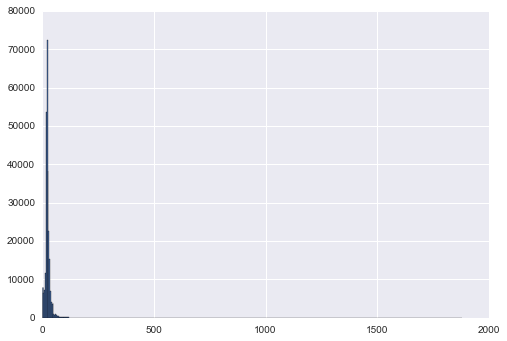

In [12]:
segments.seg_length.hist(bins=500)

Though most of the transits appear to be short, there are a few longer distances that make the plot difficult to read. This is where a transformation is useful:

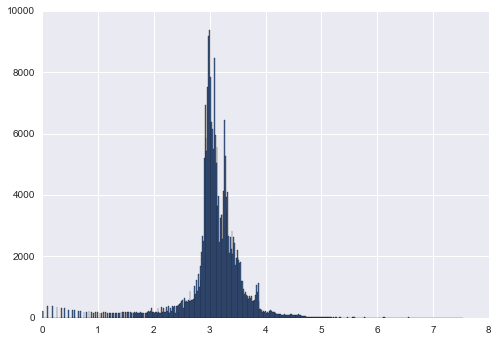

In [13]:
segments.seg_length.apply(np.log).hist(bins=500)

We can see that although there are date/time fields in the dataset, they are not in any specialized format, such as `datetime`.

In [14]:
segments.st_time.dtype

dtype('O')

Our first order of business will be to convert these data to `datetime`. The `strptime` method parses a string representation of a date and/or time field, according to the expected format of this information.

In [15]:
datetime.strptime(segments.st_time.ix[0], '%m/%d/%y %H:%M')
segments.st_time.ix[0]

'2/10/09 16:03'

The `dateutil` package includes a parser that attempts to detect the format of the date strings, and convert them automatically.

In [16]:
from dateutil.parser import parse

In [17]:
parse(segments.st_time.ix[0])

datetime.datetime(2009, 2, 10, 16, 3)

We can convert all the dates in a particular column by using the `apply` method.

In [18]:
segments.st_time.apply(lambda d: datetime.strptime(d, '%m/%d/%y %H:%M'))

0        2009-02-10 16:03:00
1        2009-04-06 14:31:00
2        2009-04-06 14:36:00
3        2009-04-10 17:58:00
4        2009-04-10 17:59:00
5        2010-03-20 16:06:00
6        2010-03-20 18:05:00
7        2011-05-04 11:28:00
8        2010-06-05 11:23:00
9        2010-06-08 11:03:00
10       2010-06-14 17:07:00
11       2010-06-17 16:35:00
12       2010-07-11 11:51:00
13       2010-07-12 15:33:00
14       2010-07-20 19:23:00
15       2010-09-10 14:00:00
16       2011-03-14 16:13:00
17       2011-03-18 11:18:00
18       2011-04-25 16:37:00
19       2011-05-14 15:51:00
20       2011-05-19 12:34:00
21       2011-05-23 21:29:00
22       2011-05-25 11:46:00
23       2011-06-01 14:32:00
24       2011-06-07 14:43:00
25       2011-08-08 15:42:00
26       2011-09-06 20:59:00
27       2011-09-08 08:22:00
28       2011-09-12 14:56:00
29       2011-10-25 12:52:00
                 ...        
262496   2009-11-22 02:13:00
262497   2009-11-22 02:15:00
262498   2009-12-02 01:46:00
262499   2009-

As a convenience, Pandas has a `to_datetime` method that will parse and convert an entire Series of formatted strings into `datetime` objects.

In [19]:
pd.to_datetime(segments.st_time[:10])

0   2009-02-10 16:03:00
1   2009-04-06 14:31:00
2   2009-04-06 14:36:00
3   2009-04-10 17:58:00
4   2009-04-10 17:59:00
5   2010-03-20 16:06:00
6   2010-03-20 18:05:00
7   2011-05-04 11:28:00
8   2010-06-05 11:23:00
9   2010-06-08 11:03:00
Name: st_time, dtype: datetime64[ns]

Pandas also has a custom NA value for missing datetime objects, `NaT`.

In [20]:
pd.to_datetime([None])

DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

Also, if `to_datetime()` has problems parsing any particular date/time format, you can pass the spec in using the `format=` argument.

The `read_*` functions now have an optional `parse_dates` argument that try to convert any columns passed to it into `datetime` format upon import:

In [21]:
segments = pd.read_csv("Data/AIS/transit_segments.csv", parse_dates=['st_time', 'end_time'])

In [22]:
segments.dtypes

mmsi                   int64
name                  object
transit                int64
segment                int64
seg_length           float64
avg_sog              float64
min_sog              float64
max_sog              float64
pdgt10               float64
st_time       datetime64[ns]
end_time      datetime64[ns]
dtype: object

Columns of the `datetime` type have an **accessor** to easily extract properties of the data type. This will return a `Series`, with the same row index as the `DataFrame`. For example:

In [23]:
segments.st_time.dt.month.head()

0    2
1    4
2    4
3    4
4    4
Name: st_time, dtype: int64

In [24]:
segments.st_time.dt.hour.head()

0    16
1    14
2    14
3    17
4    17
Name: st_time, dtype: int64

This can be used to easily filter rows by particular temporal attributes:

In [25]:
segments[segments.st_time.dt.month==2].head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00
78,3011,Charleston,16,1,18.9,0.3,0.0,16.1,0.5,2010-02-07 07:26:00,2010-02-09 19:27:00
79,3011,Charleston,17,1,19.2,0.3,0.0,6.4,0.0,2010-02-11 16:56:00,2010-02-14 14:31:00
80,3011,Charleston,18,1,24.7,0.3,0.0,5.7,0.0,2010-02-19 11:53:00,2010-02-22 16:50:00
81,3011,Charleston,19,1,40.1,0.4,0.0,16.3,0.1,2010-02-23 15:15:00,2010-03-02 14:25:00


In addition, time zone information can be applied:

In [26]:
segments.st_time.dt.tz_localize('UTC').head()

0   2009-02-10 16:03:00+00:00
1   2009-04-06 14:31:00+00:00
2   2009-04-06 14:36:00+00:00
3   2009-04-10 17:58:00+00:00
4   2009-04-10 17:59:00+00:00
Name: st_time, dtype: datetime64[ns, UTC]

In [27]:
segments.st_time.dt.tz_localize('UTC').dt.tz_convert('US/Eastern').head()

0   2009-02-10 11:03:00-05:00
1   2009-04-06 10:31:00-04:00
2   2009-04-06 10:36:00-04:00
3   2009-04-10 13:58:00-04:00
4   2009-04-10 13:59:00-04:00
Name: st_time, dtype: datetime64[ns, US/Eastern]

## Merging and joining DataFrame objects

Now that we have the vessel transit information as we need it, we may want a little more information regarding the vessels themselves. In the `data/AIS` folder there is a second table that contains information about each of the ships that traveled the segments in the `segments` table.

In [28]:
vessels = pd.read_csv("Data/AIS/vessel_information.csv", index_col='mmsi')
vessels.head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown


In [29]:
[v for v in vessels.type.unique() if v.find('/')==-1]

['Unknown',
 'Other',
 'Tug',
 'Towing',
 'Pleasure',
 'Cargo',
 'WIG',
 'Fishing',
 'BigTow',
 'MilOps',
 'Tanker',
 'Passenger',
 'SAR',
 'Sailing',
 'Reserved',
 'Law',
 'Dredging',
 'AntiPol',
 'Pilot',
 'HSC',
 'Diving',
 'Resol-18',
 'Tender',
 'Spare',
 'Medical']

In [30]:
vessels.type.value_counts()

Cargo                                                                                5622
Tanker                                                                               2440
Pleasure                                                                              601
Tug                                                                                   221
Sailing                                                                               205
Fishing                                                                               200
Other                                                                                 178
Passenger                                                                             150
Towing                                                                                117
Unknown                                                                               106
MilOps                                                                                 82
Cargo/Unkn

The challenge, however, is that several ships have travelled multiple segments, so there is not a one-to-one relationship between the rows of the two tables. The table of vessel information has a *one-to-many* relationship with the segments.

In Pandas, we can combine tables according to the value of one or more *keys* that are used to identify rows, much like an index. Using a trivial example:

In [31]:
df1 = pd.DataFrame(dict(id=range(4), age=np.random.randint(18, 31, size=4)))
df2 = pd.DataFrame(dict(id=list(range(3))+list(range(3)), 
                        score=np.random.random(size=6)))

df1

,age,id
0,19,0
1,21,1
2,19,2
3,28,3


In [32]:
df2

,id,score
0,0,0.790702
1,1,0.204783
2,2,0.123985
3,0,0.382016
4,1,0.588708
5,2,0.906351


In [33]:
pd.merge(df1, df2)

,age,id,score
0,19,0,0.790702
1,19,0,0.382016
2,21,1,0.204783
3,21,1,0.588708
4,19,2,0.123985
5,19,2,0.906351


Notice that without any information about which column to use as a key, Pandas did the right thing and used the `id` column in both tables. Unless specified otherwise, `merge` will used any common column names as keys for merging the tables. 

Notice also that `id=3` from `df1` was omitted from the merged table. This is because, by default, `merge` performs an **inner join** on the tables, meaning that the merged table represents an intersection of the two tables.

In [34]:
pd.merge(df1, df2, how='outer')

,age,id,score
0,19,0,0.790702
1,19,0,0.382016
2,21,1,0.204783
3,21,1,0.588708
4,19,2,0.123985
5,19,2,0.906351
6,28,3,NaN


The **outer join** above yields the union of the two tables, so all rows are represented, with missing values inserted as appropriate. One can also perform **right** and **left** joins to include all rows of the right or left table (*i.e.* first or second argument to `merge`), but not necessarily the other.

Looking at the two datasets that we wish to merge:

In [35]:
segments.head(1)

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00


In [36]:
vessels.head(1)

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing


we see that there is a `mmsi` value (a vessel identifier) in each table, but it is used as an index for the `vessels` table. In this case, we have to specify to join on the index for this table, and on the `mmsi` column for the other.

In [37]:
segments_merged = pd.merge(vessels, segments, left_index=True, right_on='mmsi')

In [38]:
segments_merged.head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type,...,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,2009-04-10 18:34:00
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,2009-04-10 18:35:00


In this case, the default inner join is suitable; we are not interested in observations from either table that do not have corresponding entries in the other. 

Notice that `mmsi` field that was an index on the `vessels` table is no longer an index on the merged table.

Here, we used the `merge` function to perform the merge; we could also have used the `merge` *method* for either of the tables:

In [39]:
vessels.merge(segments, left_index=True, right_on='mmsi').head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type,...,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,2009-04-10 18:34:00
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,2009-04-10 18:35:00


Occasionally, there will be fields with the same in both tables that we do not wish to use to join the tables; they may contain different information, despite having the same name. In this case, Pandas will by default append suffixes `_x` and `_y` to the columns to uniquely identify them.

In [40]:
segments['type'] = 'foo'
pd.merge(vessels, segments, left_index=True, right_on='mmsi').head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type_x,...,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time,type_y
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00,foo
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00,foo
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00,foo
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,2009-04-10 18:34:00,foo
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,2009-04-10 18:35:00,foo


This behavior can be overridden by specifying a `suffixes` argument, containing a list of the suffixes to be used for the columns of the left and right columns, respectively.

## Concatenation

A common data manipulation is appending rows or columns to a dataset that already conform to the dimensions of the exsiting rows or colums, respectively. In NumPy, this is done either with `concatenate` or the convenience "functions" `c_` and `r_`:

In [41]:
np.concatenate([np.random.random(5), np.random.random(5)])

array([ 0.77211373,  0.74229791,  0.10555925,  0.08479802,  0.02173603,
        0.75950469,  0.54890617,  0.40084868,  0.53839797,  0.68889821])

In [42]:
np.r_[np.random.random(5), np.random.random(5)]

array([ 0.92853022,  0.73010876,  0.46004371,  0.26239346,  0.32581345,
        0.35586248,  0.00477083,  0.8845276 ,  0.16459838,  0.73840654])

In [43]:
np.c_[np.random.random(5), np.random.random(5)]

array([[ 0.06631546,  0.38856811],
       [ 0.84012128,  0.1164819 ],
       [ 0.22242504,  0.2500196 ],
       [ 0.84467155,  0.9042534 ],
       [ 0.03467732,  0.36145187]])

> Notice that `c_` and `r_` are not really functions at all, since it is performing some sort of indexing operation, rather than being called. They are actually *class instances*, but they are here behaving mostly like functions. Don't think about this too hard; just know that they are there.

This operation is also called *binding* or *stacking*.

With Pandas' indexed data structures, there are additional considerations as the overlap in index values between two data structures affects how they are concatenate.

Lets import two microbiome datasets, each consisting of counts of microorganiams from a particular patient. We will use the first column of each dataset as the index.

In [44]:
mb1 = pd.read_excel('Data/microbiome/MID1.xls', 'Sheet 1', index_col=0, header=None)
mb2 = pd.read_excel('Data/microbiome/MID2.xls', 'Sheet 1', index_col=0, header=None)
mb1.shape, mb2.shape

((272, 1), (288, 1))

In [45]:
mb1.head()

,1
0,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7


Let's give the index and columns meaningful labels:

In [46]:
mb1.columns = mb2.columns = ['Count']

In [47]:
mb1.index.name = mb2.index.name = 'Taxon'

In [48]:
mb1.head()

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7


The index of these data is the unique biological classification of each organism, beginning with *domain*, *phylum*, *class*, and for some organisms, going all the way down to the genus level.

![classification](http://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Biological_classification_L_Pengo_vflip.svg/150px-Biological_classification_L_Pengo_vflip.svg.png)

In [49]:
mb1.index[:3]

Index(['Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera',
       'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus',
       'Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus'],
      dtype='object', name='Taxon')

In [50]:
mb1.index.is_unique

True

If we concatenate along `axis=0` (the default), we will obtain another data frame with the the rows concatenated:

In [51]:
pd.concat([mb1, mb2], axis=0).shape

(560, 1)

However, the index is no longer unique, due to overlap between the two DataFrames.

In [52]:
pd.concat([mb1, mb2], axis=0).index.is_unique

False

Concatenating along `axis=1` will concatenate column-wise, but respecting the indices of the two DataFrames.

In [53]:
pd.concat([mb1, mb2], axis=1).shape

(438, 2)

In [54]:
pd.concat([mb1, mb2], axis=1).head()

,Count,Count
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",NaN,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",NaN,14.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",NaN,1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",NaN,2.0


If we are only interested in taxa that are included in both DataFrames, we can specify a `join=inner` argument.

In [55]:
pd.concat([mb1, mb2], axis=1, join='inner').head()

,Count,Count
Taxon,,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7,23
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2,2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3,10
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3,9
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7,9


If we wanted to use the second table to *fill values* absent from the first table, we could use `combine_first`.

In [56]:
mb1.combine_first(mb2).head()

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",2.0
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",14.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",2.0


We can also create a hierarchical index based on keys identifying the original tables.

In [57]:
pd.concat([mb1, mb2], keys=['patient1', 'patient2']).head()

Count
         Taxon                                                    
patient1 Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7
         Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2
         Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3
         Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3
         Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7

In [58]:
pd.concat([mb1, mb2], keys=['patient1', 'patient2']).index.is_unique

True

Alternatively, you can pass keys to the concatenation by supplying the DataFrames (or Series) as a dict, resulting in a "wide" format table.

In [59]:
pd.concat(dict(patient1=mb1, patient2=mb2), axis=1).head()

,patient1,patient2
,Count,Count
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",NaN,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",NaN,14.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",NaN,1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",NaN,2.0


If you want `concat` to work like `numpy.concatanate`, you may provide the `ignore_index=True` argument.

## Exercise

In the *data/microbiome* subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10th file that describes the content of each. Write code that imports each of the data spreadsheets and combines them into a single `DataFrame`, adding the identifying information from the metadata spreadsheet as columns in the combined `DataFrame`.

In [60]:
# To combine into one single dataframe data from all 9 spreadsheets along with identifying 
# information from metadata spreadsheet as new columns, we followed these steps: 
# 1. We import metadata file using read_excel   
# 2. We use a for loop to import files from Data/microbiome one by one using read_excel
# 3. Each file of the 9 files contains two columns, one we named RNA Description and the
#    second one we named Count and this is what the code df.columns = ['RNA Description',
#     'Count'] 
# 4. We add column named Barcode in which we copy the Barcode data in the row number 
#    corresponding to the file number
# 5. We add column named Group in which we copy the Group data in the row number corresponding 
#    to the file number 
# 6. We add column named Sample in which we copy the Sample data in the row number 
#    corresponding to the file number
#    N.B: To keep track of which row corresponds to the file we imported we use a counter 
#    variable i and keep incrementing it at the end of each iteration of for loop
# 7. At the end of each iteration of for loop (an iteration here corresponds to the number 
#    of the file we are currently reading), we keep appending data into one single data frame

import pandas as pd 

path =r'Data/microbiome'

frame = pd.DataFrame()
columns = pd.read_excel(path+"/"+"metadata.xls")

i = 0
for file_ in columns.BARCODE:
    df = pd.read_excel(path+"/"+file_+".xls")
    df.columns = ['RNA Description','Count']
    df['Barcode'] = columns.BARCODE.ix[i,0]
    df['Group'] = columns.GROUP.ix[i,1]
    df['Sample'] = columns.SAMPLE.ix[i,2]
    frame = frame.append(df)
    i = i+1

frame
    

,RNA Description,Count,Barcode,Group,Sample
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID1,EXTRACTION CONTROL,NaN
1,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,MID1,EXTRACTION CONTROL,NaN
2,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,MID1,EXTRACTION CONTROL,NaN
3,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,MID1,EXTRACTION CONTROL,NaN
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1,EXTRACTION CONTROL,NaN
5,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1,EXTRACTION CONTROL,NaN
6,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1,EXTRACTION CONTROL,NaN
7,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1,EXTRACTION CONTROL,NaN
8,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1,MID1,EXTRACTION CONTROL,NaN
9,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",4,MID1,EXTRACTION CONTROL,NaN


## Reshaping DataFrame objects

In the context of a single DataFrame, we are often interested in re-arranging the layout of our data. 

This dataset is from Table 6.9 of [Statistical Methods for the Analysis of Repeated Measurements](http://www.amazon.com/Statistical-Methods-Analysis-Repeated-Measurements/dp/0387953701) by Charles S. Davis, pp. 161-163 (Springer, 2002). These data are from a multicenter, randomized controlled trial of botulinum toxin type B (BotB) in patients with cervical dystonia from nine U.S. sites.

* Randomized to placebo (N=36), 5000 units of BotB (N=36), 10,000 units of BotB (N=37)
* Response variable: total score on Toronto Western Spasmodic Torticollis Rating Scale (TWSTRS), measuring severity, pain, and disability of cervical dystonia (high scores mean more impairment)
* TWSTRS measured at baseline (week 0) and weeks 2, 4, 8, 12, 16 after treatment began

In [61]:
cdystonia = pd.read_csv("Data/cdystonia.csv", index_col=None)
cdystonia.head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


This dataset includes repeated measurements of the same individuals (longitudinal data). Its possible to present such information in (at least) two ways: showing each repeated measurement in their own row, or in multiple columns representing multiple measurements.


The `stack` method rotates the data frame so that columns are represented in rows:

In [62]:
stacked = cdystonia.stack()
stacked

0    patient        1
     obs            1
     week           0
     site           1
     id             1
     treat      5000U
     age           65
     sex            F
     twstrs        32
1    patient        1
     obs            2
     week           2
     site           1
     id             1
     treat      5000U
     age           65
     sex            F
     twstrs        30
2    patient        1
     obs            3
     week           4
     site           1
     id             1
     treat      5000U
     age           65
     sex            F
     twstrs        24
3    patient        1
     obs            4
     week           8
                ...  
627  age           57
     sex            M
     twstrs        38
628  patient      109
     obs            4
     week           8
     site           9
     id            11
     treat      5000U
     age           57
     sex            M
     twstrs        33
629  patient      109
     obs            5
     week 

To complement this, `unstack` pivots from rows back to columns.

In [63]:
stacked.unstack().head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


For this dataset, it makes sense to create a hierarchical index based on the patient and observation:

In [64]:
cdystonia2 = cdystonia.set_index(['patient','obs'])
cdystonia2.head()

week  site  id  treat  age sex  twstrs
patient obs                                        
1       1       0     1   1  5000U   65   F      32
        2       2     1   1  5000U   65   F      30
        3       4     1   1  5000U   65   F      24
        4       8     1   1  5000U   65   F      37
        5      12     1   1  5000U   65   F      39

In [65]:
cdystonia2.index.is_unique

True

If we want to transform this data so that repeated measurements are in columns, we can `unstack` the `twstrs` measurements according to `obs`.

In [66]:
twstrs_wide = cdystonia2['twstrs'].unstack('obs')
twstrs_wide.head()

obs,1,2,3,4,5,6
patient,,,,,,
1,32.0,30.0,24.0,37.0,39.0,36.0
2,60.0,26.0,27.0,41.0,65.0,67.0
3,44.0,20.0,23.0,26.0,35.0,35.0
4,53.0,61.0,64.0,62.0,NaN,NaN
5,53.0,35.0,48.0,49.0,41.0,51.0


In [67]:
cdystonia_wide = (cdystonia[['patient','site','id','treat','age','sex']]
                  .drop_duplicates()
                  .merge(twstrs_wide, right_index=True, left_on='patient', how='inner')
                  .head())
cdystonia_wide

,patient,site,id,treat,age,sex,1,2,3,4,5,6
0,1,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
6,2,1,2,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0
12,3,1,3,5000U,64,F,44.0,20.0,23.0,26.0,35.0,35.0
18,4,1,4,Placebo,59,F,53.0,61.0,64.0,62.0,NaN,NaN
22,5,1,5,10000U,76,F,53.0,35.0,48.0,49.0,41.0,51.0


A slightly cleaner way of doing this is to set the patient-level information as an index before unstacking:

In [68]:
(cdystonia.set_index(['patient','site','id','treat','age','sex','week'])['twstrs']
     .unstack('week').head())

,,,,,week,0,2,4,8,12,16
patient,site,id,treat,age,sex,,,,,,
1,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
2,1,2,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0
3,1,3,5000U,64,F,44.0,20.0,23.0,26.0,35.0,35.0
4,1,4,Placebo,59,F,53.0,61.0,64.0,62.0,NaN,NaN
5,1,5,10000U,76,F,53.0,35.0,48.0,49.0,41.0,51.0


To convert our "wide" format back to long, we can use the `melt` function, appropriately parameterized. This function is useful for `DataFrame`s where one
or more columns are identifier variables (`id_vars`), with the remaining columns being measured variables (`value_vars`). The measured variables are "unpivoted" to
the row axis, leaving just two non-identifier columns, a *variable* and its corresponding *value*, which can both be renamed using optional arguments.

In [69]:
pd.melt(cdystonia_wide, id_vars=['patient','site','id','treat','age','sex'], 
        var_name='obs', value_name='twsters').head()

,patient,site,id,treat,age,sex,obs,twsters
0,1,1,1,5000U,65,F,1,32.0
1,2,1,2,10000U,70,F,1,60.0
2,3,1,3,5000U,64,F,1,44.0
3,4,1,4,Placebo,59,F,1,53.0
4,5,1,5,10000U,76,F,1,53.0


This illustrates the two formats for longitudinal data: **long** and **wide** formats. Its typically better to store data in long format because additional data can be included as additional rows in the database, while wide format requires that the entire database schema be altered by adding columns to every row as data are collected.

The preferable format for analysis depends entirely on what is planned for the data, so it is imporant to be able to move easily between them.

## Pivoting

The `pivot` method allows a DataFrame to be transformed easily between long and wide formats in the same way as a pivot table is created in a spreadsheet. It takes three arguments: `index`, `columns` and `values`, corresponding to the DataFrame index (the row headers), columns and cell values, respectively.

For example, we may want the `twstrs` variable (the response variable) in wide format according to patient, as we saw with the unstacking method above:

In [70]:
cdystonia.pivot(index='patient', columns='obs', values='twstrs').head()

obs,1,2,3,4,5,6
patient,,,,,,
1,32.0,30.0,24.0,37.0,39.0,36.0
2,60.0,26.0,27.0,41.0,65.0,67.0
3,44.0,20.0,23.0,26.0,35.0,35.0
4,53.0,61.0,64.0,62.0,NaN,NaN
5,53.0,35.0,48.0,49.0,41.0,51.0


If we omit the `values` argument, we get a `DataFrame` with hierarchical columns, just as when we applied `unstack` to the hierarchically-indexed table:

In [71]:
cdystonia.pivot('patient', 'obs')

week                            site                 ...    sex        \
obs        1    2    3    4     5     6    1    2    3    4  ...      3     4   
patient                                                      ...                
1        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...      F     F   
2        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...      F     F   
3        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...      F     F   
4        0.0  2.0  4.0  8.0   NaN   NaN  1.0  1.0  1.0  1.0  ...      F     F   
5        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...      F     F   
6        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...      F     F   
7        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...      M     M   
8        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...      M     M   
9        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...      F     F   
10       0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...      M     M   
11       0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...      F     F   
12       0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...      F     F   
13       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...      F     F   
14       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...      F     F   
15       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...      F     F   
16       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...      M     M   
17       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...      F     F   
18       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...      F     F   
19       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...      F     F   
20       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...      F     F   
21       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...      F     F   
22       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...      M     M   
23       0.0  2.0  4.0  NaN  12.0  16.0  2.0  2.0  2.0  NaN  ...      F  None   
24       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...      M     M   
25       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...      M     M   
26       0.0  NaN  4.0  8.0  12.0  16.0  2.0  NaN  2.0  2.0  ...      M     M   
27       0.0  2.0  4.0  8.0  12.0  16.0  3.0  3.0  3.0  3.0  ...      F     F   
28       0.0  2.0  4.0  8.0  12.0  16.0  3.0  3.0  3.0  3.0  ...      F     F   
29       0.0  2.0  4.0  8.0  12.0  16.0  3.0  3.0  3.0  3.0  ...      M     M   
30       0.0  2.0  4.0  8.0  12.0  16.0  3.0  3.0  3.0  3.0  ...      F     F   
...      ...  ...  ...  ...   ...   ...  ...  ...  ...  ...  ...    ...   ...   
80       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...      F     F   
81       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...      M     M   
82       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...      M     M   
83       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...      F     F   
84       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...      M     M   
85       0.0  NaN  NaN  NaN   NaN   NaN  8.0  NaN  NaN  NaN  ...   None  None   
86       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...      F     F   
87       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...      M     M   
88       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...      M     M   
89       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...      F     F   
90       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...      F     F   
91       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...      M     M   
92       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...      M     M   
93       0.0  NaN  4.0  8.0  12.0  16.0  8.0  NaN  8.0  8.0  ...      M     M   
94       0.0  2.0  4.0  8.0   NaN  16.0  8.0  8.0  8.0  8.0  ...      M     M   
95       0.0  2.0  4.0  8.0  12.0  16.0

A related method, `pivot_table`, creates a spreadsheet-like table with a hierarchical index, and allows the values of the table to be populated using an arbitrary aggregation function.

In [72]:
cdystonia.pivot_table(index=['site', 'treat'], columns='week', values='twstrs', 
                      aggfunc=max).head(20)

week          0   2   4   8   12  16
site treat                          
1    10000U   60  41  48  49  65  67
     5000U    44  32  34  43  42  46
     Placebo  53  61  64  62  32  38
2    10000U   65  60  60  64  67  66
     5000U    67  64  65  64  62  64
     Placebo  53  56  52  57  61  54
3    10000U   50  43  51  46  49  56
     5000U    52  44  47  50  50  49
     Placebo  43  38  40  48  49  44
4    10000U   54  52  52  54  51  57
     5000U    52  34  43  45  47  46
     Placebo  52  55  51  52  54  57
5    10000U   50  50  32  46  54  57
     5000U    60  53  55  62  67  26
     Placebo  60  57  53  52  53  58
6    10000U   55  56  47  53  51  51
     5000U    59  55  50  56  59  53
     Placebo  54  53  51  57  57  57
7    10000U   53  47  45  45  50  53
     5000U    53  45  52  51  52  53

For a simple cross-tabulation of group frequencies, the `crosstab` function (not a method) aggregates counts of data according to factors in rows and columns. The factors may be hierarchical if desired.

In [73]:
pd.crosstab(cdystonia.sex, cdystonia.site)

site,1,2,3,4,5,6,7,8,9
sex,,,,,,,,,
F,52,53,42,30,22,54,66,48,28
M,18,29,30,18,11,33,6,58,33


## Data transformation

There are a slew of additional operations for DataFrames that we would collectively refer to as "transformations" which include tasks such as removing duplicate values, replacing values, and grouping values.

### Dealing with duplicates

We can easily identify and remove duplicate values from `DataFrame` objects. For example, say we want to removed ships from our `vessels` dataset that have the same name:

In [74]:
vessels.duplicated(subset='names')

mmsi
1            False
9            False
21           False
74           False
103          False
310          False
3011         False
4731         False
15151        False
46809        False
80404        False
82003        False
298716       False
366235       False
439541       False
453556       False
505843       False
527918       False
565026       False
572329       False
587370       False
641114       False
642262       False
693559       False
883085        True
1193046      False
1193946      False
1233916      False
1239468      False
3041300      False
             ...  
720728000     True
720754000    False
720768000    False
725004700    False
725005560    False
725005570    False
725011300     True
725018300    False
725019006     True
725021000    False
725022000    False
730000161    False
730010001    False
730026000    False
730031000    False
735057548    False
735059037    False
760101000    False
770576100    False
812719000    False
857632392    False
8669468

In [75]:
vessels.drop_duplicates(['names'])

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown
310,1,Arabella,N,Bermuda,Foreign,1,47.0,47.0,1,Unknown
3011,1,Charleston,N,Anguilla,Foreign,1,160.0,160.0,1,Other
4731,1,000004731,N,Yemen (Republic of),Foreign,1,30.0,30.0,1,Unknown
15151,2,R L Enterkin/Us Vessel,N,Unknown,Unknown,2,60.0/175.0,175.0,1,Tug


### Value replacement

Frequently, we get data columns that are encoded as strings that we wish to represent numerically for the purposes of including it in a quantitative analysis. For example, consider the treatment variable in the cervical dystonia dataset:

In [76]:
cdystonia.treat.value_counts()

10000U     213
5000U      211
Placebo    207
Name: treat, dtype: int64

A logical way to specify these numerically is to change them to integer values, perhaps using "Placebo" as a baseline value. If we create a dict with the original values as keys and the replacements as values, we can pass it to the `map` method to implement the changes.

In [77]:
treatment_map = {'Placebo': 0, '5000U': 1, '10000U': 2}

In [78]:
cdystonia['treatment'] = cdystonia.treat.map(treatment_map)
cdystonia.treatment

0      1
1      1
2      1
3      1
4      1
5      1
6      2
7      2
8      2
9      2
10     2
11     2
12     1
13     1
14     1
15     1
16     1
17     1
18     0
19     0
20     0
21     0
22     2
23     2
24     2
25     2
26     2
27     2
28     2
29     2
      ..
601    2
602    2
603    2
604    0
605    0
606    0
607    0
608    0
609    0
610    1
611    1
612    1
613    1
614    1
615    1
616    2
617    2
618    2
619    2
620    2
621    2
622    2
623    2
624    2
625    2
626    1
627    1
628    1
629    1
630    1
Name: treatment, dtype: int64

Alternately, if we simply want to replace particular values in a `Series` or `DataFrame`, we can use the `replace` method. 

An example where replacement is useful is dealing with zeros in certain transformations. For example, if we try to take the log of a set of values:

In [79]:
vals = pd.Series([float(i)**10 for i in range(10)])
vals

0    0.000000e+00
1    1.000000e+00
2    1.024000e+03
3    5.904900e+04
4    1.048576e+06
5    9.765625e+06
6    6.046618e+07
7    2.824752e+08
8    1.073742e+09
9    3.486784e+09
dtype: float64

In [80]:
np.log(vals)

0         -inf
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

In such situations, we can replace the zero with a value so small that it makes no difference to the ensuing analysis. We can do this with `replace`.

In [81]:
vals = vals.replace(0, 1e-6)
np.log(vals)

0   -13.815511
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

We can also perform the same replacement that we used `map` for with `replace`:

In [82]:
cdystonia2.treat.replace({'Placebo': 0, '5000U': 1, '10000U': 2})

patient  obs
1        1      1
         2      1
         3      1
         4      1
         5      1
         6      1
2        1      2
         2      2
         3      2
         4      2
         5      2
         6      2
3        1      1
         2      1
         3      1
         4      1
         5      1
         6      1
4        1      0
         2      0
         3      0
         4      0
5        1      2
         2      2
         3      2
         4      2
         5      2
         6      2
6        1      2
         2      2
               ..
104      3      2
         5      2
         6      2
105      1      0
         2      0
         3      0
         4      0
         5      0
         6      0
106      1      1
         2      1
         3      1
         4      1
         5      1
         6      1
107      1      2
         3      2
         4      2
         6      2
108      1      2
         2      2
         3      2
         4      2
         5     

### Inidcator variables

For some statistical analyses (*e.g.* regression models or analyses of variance), categorical or group variables need to be converted into columns of indicators--zeros and ones--to create a so-called **design matrix**. The Pandas function `get_dummies` (indicator variables are also known as *dummy variables*) makes this transformation straightforward.

Let's consider the DataFrame containing the ships corresponding to the transit segments on the eastern seaboard. The `type` variable denotes the class of vessel; we can create a matrix of indicators for this. For simplicity, lets filter out the 5 most common types of ships:


In [83]:
top5 = vessels.type.isin(vessels.type.value_counts().index[:5])
top5.head(10)

mmsi
1        False
9        False
21       False
74       False
103      False
310      False
3011     False
4731     False
15151     True
46809    False
Name: type, dtype: bool

In [84]:
vessels5 = vessels[top5]

In [85]:
pd.get_dummies(vessels5.type).head(10)

,Cargo,Pleasure,Sailing,Tanker,Tug
mmsi,,,,,
15151,0.0,0.0,0.0,0.0,1.0
80404,0.0,1.0,0.0,0.0,0.0
366235,1.0,0.0,0.0,0.0,0.0
587370,0.0,0.0,0.0,0.0,1.0
693559,0.0,0.0,0.0,0.0,1.0
1233916,0.0,1.0,0.0,0.0,0.0
3041300,1.0,0.0,0.0,0.0,0.0
3663760,1.0,0.0,0.0,0.0,0.0
3688360,1.0,0.0,0.0,0.0,0.0


## Categorical Data

Pandas provides a convenient `dtype` for reprsenting categorical (factor) data, called `category`. 

For example, the `treat` column in the cervical dystonia dataset represents three treatment levels in a clinical trial, and is imported by default as an `object` type, since it is a mixture of string characters.

In [86]:
cdystonia.treat.head()

0    5000U
1    5000U
2    5000U
3    5000U
4    5000U
Name: treat, dtype: object

We can convert this to a `category` type either by the `Categorical` constructor, or casting the column using `astype`:

In [87]:
pd.Categorical(cdystonia.treat)

[5000U, 5000U, 5000U, 5000U, 5000U, ..., 5000U, 5000U, 5000U, 5000U, 5000U]
Length: 631
Categories (3, object): [10000U, 5000U, Placebo]

In [88]:
cdystonia['treat'] = cdystonia.treat.astype('category')

In [89]:
cdystonia.treat.describe()

count        631
unique         3
top       10000U
freq         213
Name: treat, dtype: object

By default the Categorical type represents an unordered categorical.

In [90]:
cdystonia.treat.cat.categories

Index(['10000U', '5000U', 'Placebo'], dtype='object')

However, an ordering can be imposed. The order is lexical by default, but will assume the order of the listed categories to be the desired order.

In [91]:
cdystonia.treat.cat.categories = ['Placebo', '5000U', '10000U']

In [92]:
cdystonia.treat.cat.as_ordered().head()

0    5000U
1    5000U
2    5000U
3    5000U
4    5000U
dtype: category
Categories (3, object): [Placebo < 5000U < 10000U]

The important difference between the `category` type and the `object` type is that `category` is represented by an underlying array of integers, which is then mapped to character labels.

In [93]:
cdystonia.treat.cat.codes

0      1
1      1
2      1
3      1
4      1
5      1
6      0
7      0
8      0
9      0
10     0
11     0
12     1
13     1
14     1
15     1
16     1
17     1
18     2
19     2
20     2
21     2
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
601    0
602    0
603    0
604    2
605    2
606    2
607    2
608    2
609    2
610    1
611    1
612    1
613    1
614    1
615    1
616    0
617    0
618    0
619    0
620    0
621    0
622    0
623    0
624    0
625    0
626    1
627    1
628    1
629    1
630    1
dtype: int8

Notice that these are 8-bit integers, which are essentially single bytes of data, making memory usage lower.

There is also a performance benefit. Consider an operation such as calculating the total segment lengths for each ship in the `segments` table (this is also a preview of pandas' `groupby` operation!):

In [94]:
%time segments.groupby(segments.name).seg_length.sum().sort_values(ascending=False, inplace=False).head()

CPU times: user 32.5 ms, sys: 4.82 ms, total: 37.4 ms
Wall time: 36.6 ms


name
Georgia             93941.2
P/b Phantom         39102.4
Padre Island        36969.0
Dodge Island        33736.9
Terrapin  Island    32845.6
Name: seg_length, dtype: float64

In [95]:
segments['name'] = segments.name.astype('category')

In [96]:
%time segments.groupby(segments.name).seg_length.sum().sort_values(ascending=False, inplace=False).head()

CPU times: user 8.82 ms, sys: 1.2 ms, total: 10 ms
Wall time: 9.4 ms


name
Georgia             93941.2
P/b Phantom         39102.4
Padre Island        36969.0
Dodge Island        33736.9
Terrapin  Island    32845.6
Name: seg_length, dtype: float64

Hence, we get a considerable speedup simply by using the appropriate `dtype` for our data.

### Discretization

Pandas' `cut` function can be used to group continuous or countable data in to bins. Discretization is generally a very **bad idea** for statistical analysis, so use this function responsibly!

Lets say we want to bin the ages of the cervical dystonia patients into a smaller number of groups:

In [97]:
cdystonia.age.describe()

count    631.000000
mean      55.616482
std       12.123910
min       26.000000
25%       46.000000
50%       56.000000
75%       65.000000
max       83.000000
Name: age, dtype: float64

Let's transform these data into decades, beginnnig with individuals in their 20's and ending with those in their 80's:

In [98]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90])[:30]

0     (60, 70]
1     (60, 70]
2     (60, 70]
3     (60, 70]
4     (60, 70]
5     (60, 70]
6     (60, 70]
7     (60, 70]
8     (60, 70]
9     (60, 70]
10    (60, 70]
11    (60, 70]
12    (60, 70]
13    (60, 70]
14    (60, 70]
15    (60, 70]
16    (60, 70]
17    (60, 70]
18    (50, 60]
19    (50, 60]
20    (50, 60]
21    (50, 60]
22    (70, 80]
23    (70, 80]
24    (70, 80]
25    (70, 80]
26    (70, 80]
27    (70, 80]
28    (50, 60]
29    (50, 60]
Name: age, dtype: category
Categories (7, object): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90]]

The parentheses indicate an open interval, meaning that the interval includes values up to but *not including* the endpoint, whereas the square bracket is a closed interval, where the endpoint is included in the interval. We can switch the closure to the left side by setting the `right` flag to `False`:

In [99]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90], right=False)[:30]

0     [60, 70)
1     [60, 70)
2     [60, 70)
3     [60, 70)
4     [60, 70)
5     [60, 70)
6     [70, 80)
7     [70, 80)
8     [70, 80)
9     [70, 80)
10    [70, 80)
11    [70, 80)
12    [60, 70)
13    [60, 70)
14    [60, 70)
15    [60, 70)
16    [60, 70)
17    [60, 70)
18    [50, 60)
19    [50, 60)
20    [50, 60)
21    [50, 60)
22    [70, 80)
23    [70, 80)
24    [70, 80)
25    [70, 80)
26    [70, 80)
27    [70, 80)
28    [50, 60)
29    [50, 60)
Name: age, dtype: category
Categories (7, object): [[20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80) < [80, 90)]

Since the data are now **ordinal**, rather than numeric, we can give them labels:

In [100]:
pd.cut(cdystonia.age, [20,40,60,80,90], labels=['young','middle-aged','old','really old'])[:30]

0             old
1             old
2             old
3             old
4             old
5             old
6             old
7             old
8             old
9             old
10            old
11            old
12            old
13            old
14            old
15            old
16            old
17            old
18    middle-aged
19    middle-aged
20    middle-aged
21    middle-aged
22            old
23            old
24            old
25            old
26            old
27            old
28    middle-aged
29    middle-aged
Name: age, dtype: category
Categories (4, object): [young < middle-aged < old < really old]

A related function `qcut` uses empirical quantiles to divide the data. If, for example, we want the quartiles -- (0-25%], (25-50%], (50-70%], (75-100%] -- we can just specify 4 intervals, which will be equally-spaced by default:

In [101]:
pd.qcut(cdystonia.age, 4)[:30]

0     (56, 65]
1     (56, 65]
2     (56, 65]
3     (56, 65]
4     (56, 65]
5     (56, 65]
6     (65, 83]
7     (65, 83]
8     (65, 83]
9     (65, 83]
10    (65, 83]
11    (65, 83]
12    (56, 65]
13    (56, 65]
14    (56, 65]
15    (56, 65]
16    (56, 65]
17    (56, 65]
18    (56, 65]
19    (56, 65]
20    (56, 65]
21    (56, 65]
22    (65, 83]
23    (65, 83]
24    (65, 83]
25    (65, 83]
26    (65, 83]
27    (65, 83]
28    (56, 65]
29    (56, 65]
Name: age, dtype: category
Categories (4, object): [[26, 46] < (46, 56] < (56, 65] < (65, 83]]

Alternatively, one can specify custom quantiles to act as cut points:

In [102]:
quantiles = pd.qcut(segments.seg_length, [0, 0.01, 0.05, 0.95, 0.99, 1])
quantiles[:30]

0       (1.8, 7.8]
1      (7.8, 45.4]
2       (1.8, 7.8]
3      (7.8, 45.4]
4      (7.8, 45.4]
5      (7.8, 45.4]
6     (45.4, 89.7]
7      (7.8, 45.4]
8      (7.8, 45.4]
9      (7.8, 45.4]
10      (1.8, 7.8]
11     (7.8, 45.4]
12     (7.8, 45.4]
13     (7.8, 45.4]
14     (7.8, 45.4]
15    (45.4, 89.7]
16    (45.4, 89.7]
17     (7.8, 45.4]
18     (7.8, 45.4]
19     (7.8, 45.4]
20      (1.8, 7.8]
21      (1.8, 7.8]
22     (7.8, 45.4]
23     (7.8, 45.4]
24     (7.8, 45.4]
25     (7.8, 45.4]
26     (7.8, 45.4]
27     (7.8, 45.4]
28     (7.8, 45.4]
29     (7.8, 45.4]
Name: seg_length, dtype: category
Categories (5, object): [[1, 1.8] < (1.8, 7.8] < (7.8, 45.4] < (45.4, 89.7] < (89.7, 1882]]

Note that you can easily combine discretiztion with the generation of indicator variables shown above:

In [103]:
pd.get_dummies(quantiles).head(10)

,"[1, 1.8]","(1.8, 7.8]","(7.8, 45.4]","(45.4, 89.7]","(89.7, 1882]"
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0


### Permutation and sampling

For some data analysis tasks, such as simulation, we need to be able to randomly reorder our data, or draw random values from it. Calling NumPy's `permutation` function with the length of the sequence you want to permute generates an array with a permuted sequence of integers, which can be used to re-order the sequence.

In [104]:
new_order = np.random.permutation(len(segments))
new_order[:30]

array([197355, 248983,  16388, 107417, 129241,  11024, 107360, 179270,
        41647,  93850,  87450, 168219, 261685, 245976, 137834, 169367,
        65895, 164641, 238919, 181159,  77146, 103866, 191193, 116963,
        62094, 204152,  98134, 153652, 125511,  58132])

Using this sequence as an argument to the `take` method results in a reordered DataFrame:

In [105]:
segments.take(new_order).head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time,type
197355,371371000,Leo Advance,4,1,2.6,10.9,10.8,11.0,100.0,2008-11-19 02:28:00,2008-11-19 02:42:00,foo
248983,636090655,M/v Msc Prague,196,1,2.7,2.9,0.8,8.2,0.0,2012-03-04 18:54:00,2012-03-04 19:54:00,foo
16388,220373000,Torm Helvig,8,1,31.5,13.6,13.3,13.8,100.0,2012-01-01 05:43:00,2012-01-01 08:03:00,foo
107417,366724450,Ssv Corwith Cramer,59,2,21.7,5.5,4.2,6.9,0.0,2011-09-05 10:12:00,2011-09-05 14:01:00,foo
129241,366939790,Doris Moran,126,1,32.5,7.0,5.4,8.4,0.0,2010-07-05 08:44:00,2010-07-05 13:25:00,foo


Compare this ordering with the original:

In [106]:
segments.head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time,type
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00,foo
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00,foo
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00,foo
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,2009-04-10 18:34:00,foo
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,2009-04-10 18:35:00,foo


For random sampling, `DataFrame` and `Series` objects have a `sample` method that can be used to draw samples, with or without replacement:

In [107]:
vessels.sample(n=10)

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
636092124,1,Johann Jacob,N,Liberia (Republic of),Foreign,2,227.0/228.0,228.0,1,Tanker
240713000,1,Desert Serenity,N,Greece,Foreign,1,190.0,190.0,1,Cargo
538003144,1,Ecosand G.o,N,Marshall Islands (Republic of the),Foreign,1,225.0,225.0,1,Cargo
209012000,1,Panamax Ride,N,Cyprus (Republic of),Foreign,1,230.0,230.0,1,Cargo
367092680,2,367092680/Carol Coles,N,United States of America,Domestic,1,24.0,24.0,1,Fishing
477784000,1,Ocean Pride,N,Hong Kong (Special Administrative Region of Ch...,Foreign,1,225.0,225.0,1,Cargo
354591000,1,Pyxis Leader,N,Panama (Republic of),Foreign,1,199.0,199.0,1,Cargo
538003414,1,Sophia D,N,Marshall Islands (Republic of the),Foreign,1,188.0,188.0,1,Cargo
352571000,1,Fortune Epoch,N,Panama (Republic of),Foreign,1,128.0,128.0,1,Cargo


In [108]:
vessels.sample(n=10, replace=True)

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
636091881,1,Annabell,N,Liberia (Republic of),Foreign,1,180.0,180.0,1,Cargo
205553000,1,Exemplar,N,Belgium,Foreign,1,292.0,292.0,1,Tanker
369747000,1,Hos Greystone,N,United States of America,Domestic,1,75.0,75.0,1,Tanker
356287000,1,Msc Emma,N,Panama (Republic of),Foreign,1,294.0,294.0,1,Cargo
259895000,1,Tirranna,N,Norway,Foreign,1,232.0,232.0,1,Cargo
248678000,1,Wilson Norfolk,N,Malta,Foreign,1,123.0,123.0,1,Cargo
538003525,1,Chem Lyra,N,Marshall Islands (Republic of the),Foreign,1,144.0,144.0,1,Tanker
311046600,1,Gotland Sofia,N,Bahamas (Commonwealth of the),Foreign,1,183.0,183.0,1,Tanker
376126000,1,Anna_m,N,Saint Vincent and the Grenadines,Foreign,1,221.0,221.0,1,Cargo


## Data aggregation and GroupBy operations

One of the most powerful features of Pandas is its **GroupBy** functionality. On occasion we may want to perform operations on *groups* of observations within a dataset. For exmaple:

* **aggregation**, such as computing the sum of mean of each group, which involves applying a function to each group and returning the aggregated results
* **slicing** the DataFrame into groups and then doing something with the resulting slices (*e.g.* plotting)
* group-wise **transformation**, such as standardization/normalization

In [109]:
cdystonia_grouped = cdystonia.groupby(cdystonia.patient)

This *grouped* dataset is hard to visualize



In [110]:
cdystonia_grouped

However, the grouping is only an intermediate step; for example, we may want to **iterate** over each of the patient groups:

In [111]:
for patient, group in cdystonia_grouped:
    print('patient', patient)
    print('group', group)

patient 1
group    patient  obs  week  site  id  treat  age sex  twstrs  treatment
0        1    1     0     1   1  5000U   65   F      32          1
1        1    2     2     1   1  5000U   65   F      30          1
2        1    3     4     1   1  5000U   65   F      24          1
3        1    4     8     1   1  5000U   65   F      37          1
4        1    5    12     1   1  5000U   65   F      39          1
5        1    6    16     1   1  5000U   65   F      36          1
patient 2
group     patient  obs  week  site  id    treat  age sex  twstrs  treatment
6         2    1     0     1   2  Placebo   70   F      60          2
7         2    2     2     1   2  Placebo   70   F      26          2
8         2    3     4     1   2  Placebo   70   F      27          2
9         2    4     8     1   2  Placebo   70   F      41          2
10        2    5    12     1   2  Placebo   70   F      65          2
11        2    6    16     1   2  Placebo   70   F      67          2
patient 3

A common data analysis procedure is the **split-apply-combine** operation, which groups subsets of data together, applies a function to each of the groups, then recombines them into a new data table.

For example, we may want to aggregate our data with with some function.

![split-apply-combine](http://f.cl.ly/items/0s0Z252j0X0c3k3P1M47/Screen%20Shot%202013-06-02%20at%203.04.04%20PM.png)

<div align="right">*(figure taken from "Python for Data Analysis", p.251)*</div>

We can aggregate in Pandas using the `aggregate` (or `agg`, for short) method:

In [112]:
cdystonia_grouped.agg(np.mean).head()

,patient,obs,week,site,id,age,twstrs,treatment
patient,,,,,,,,
1,1.0,3.5,7.0,1.0,1.0,65.0,33.000000,1.0
2,2.0,3.5,7.0,1.0,2.0,70.0,47.666667,2.0
3,3.0,3.5,7.0,1.0,3.0,64.0,30.500000,1.0
4,4.0,2.5,3.5,1.0,4.0,59.0,60.000000,0.0
5,5.0,3.5,7.0,1.0,5.0,76.0,46.166667,2.0


Notice that the `treat` and `sex` variables are not included in the aggregation. Since it does not make sense to aggregate non-string variables, these columns are simply ignored by the method.

Some aggregation functions are so common that Pandas has a convenience method for them, such as `mean`:

In [113]:
cdystonia_grouped.mean().head()

,patient,obs,week,site,id,age,twstrs,treatment
patient,,,,,,,,
1,1.0,3.5,7.0,1.0,1.0,65.0,33.000000,1.0
2,2.0,3.5,7.0,1.0,2.0,70.0,47.666667,2.0
3,3.0,3.5,7.0,1.0,3.0,64.0,30.500000,1.0
4,4.0,2.5,3.5,1.0,4.0,59.0,60.000000,0.0
5,5.0,3.5,7.0,1.0,5.0,76.0,46.166667,2.0


The `add_prefix` and `add_suffix` methods can be used to give the columns of the resulting table labels that reflect the transformation:

In [114]:
cdystonia_grouped.mean().add_suffix('_mean').head()

,patient_mean,obs_mean,week_mean,site_mean,id_mean,age_mean,twstrs_mean,treatment_mean
patient,,,,,,,,
1,1.0,3.5,7.0,1.0,1.0,65.0,33.000000,1.0
2,2.0,3.5,7.0,1.0,2.0,70.0,47.666667,2.0
3,3.0,3.5,7.0,1.0,3.0,64.0,30.500000,1.0
4,4.0,2.5,3.5,1.0,4.0,59.0,60.000000,0.0
5,5.0,3.5,7.0,1.0,5.0,76.0,46.166667,2.0


In [115]:
# The median of the `twstrs` variable
cdystonia_grouped['twstrs'].quantile(0.5)

patient
1      34.0
2      50.5
3      30.5
4      61.5
5      48.5
6      48.0
7      42.0
8      32.5
9      35.5
10     20.5
11     44.5
12     26.0
13     45.5
14     47.5
15     51.5
16     56.5
17     63.0
18     53.5
19     42.0
20     53.5
21     64.0
22     41.0
23     58.0
24     52.5
25     31.0
26     47.0
27     49.5
28     24.5
29     38.0
30     32.0
       ... 
80     25.0
81     44.0
82     29.0
83     19.5
84     32.5
85     37.0
86     24.5
87     38.5
88     25.5
89     44.5
90     49.0
91     53.0
92     26.5
93     34.0
94     37.0
95     16.0
96     35.0
97     46.0
98     33.5
99     29.0
100    61.0
101    32.5
102    51.5
103    45.0
104    46.0
105    45.5
106    67.5
107    44.0
108    50.5
109    38.0
Name: twstrs, dtype: float64

If we wish, we can easily aggregate according to multiple keys:

In [116]:
cdystonia.groupby(['week','site']).mean().head()

patient  obs   id        age     twstrs  treatment
week site                                                    
0    1         6.5  1.0  6.5  59.000000  43.083333   1.000000
     2        19.5  1.0  7.5  53.928571  51.857143   0.928571
     3        32.5  1.0  6.5  51.500000  38.750000   1.000000
     4        42.5  1.0  4.5  59.250000  48.125000   1.000000
     5        49.5  1.0  3.5  51.833333  49.333333   1.000000

Alternately, we can **transform** the data, using a function of our choice with the `transform` method:

In [117]:
normalize = lambda x: (x - x.mean())/x.std()

cdystonia_grouped.transform(normalize).head()

,patient,obs,week,site,id,age,twstrs,treatment
0,NaN,-1.336306,-1.135550,NaN,NaN,NaN,-0.181369,NaN
1,NaN,-0.801784,-0.811107,NaN,NaN,NaN,-0.544107,NaN
2,NaN,-0.267261,-0.486664,NaN,NaN,NaN,-1.632322,NaN
3,NaN,0.267261,0.162221,NaN,NaN,NaN,0.725476,NaN
4,NaN,0.801784,0.811107,NaN,NaN,NaN,1.088214,NaN


It is easy to do column selection within `groupby` operations, if we are only interested split-apply-combine operations on a subset of columns:

In [118]:
cdystonia_grouped['twstrs'].mean().head()

patient
1    33.000000
2    47.666667
3    30.500000
4    60.000000
5    46.166667
Name: twstrs, dtype: float64

In [119]:
# This gives the same result as a DataFrame
cdystonia_grouped[['twstrs']].mean().head()

,twstrs
patient,
1,33.000000
2,47.666667
3,30.500000
4,60.000000
5,46.166667


If you simply want to divide your DataFrame into chunks for later use, its easy to convert them into a dict so that they can be easily indexed out as needed:

In [120]:
chunks = dict(list(cdystonia_grouped))

In [121]:
chunks[4]

,patient,obs,week,site,id,treat,age,sex,twstrs,treatment
18,4,1,0,1,4,10000U,59,F,53,0
19,4,2,2,1,4,10000U,59,F,61,0
20,4,3,4,1,4,10000U,59,F,64,0
21,4,4,8,1,4,10000U,59,F,62,0


By default, `groupby` groups by row, but we can specify the `axis` argument to change this. For example, we can group our columns by `dtype` this way:

In [122]:
grouped_by_type = cdystonia.groupby(cdystonia.dtypes, axis=1)
{g:grouped_by_type.get_group(g) for g in grouped_by_type.groups}

{category:        treat
 0      5000U
 1      5000U
 2      5000U
 3      5000U
 4      5000U
 5      5000U
 6    Placebo
 7    Placebo
 8    Placebo
 9    Placebo
 10   Placebo
 11   Placebo
 12     5000U
 13     5000U
 14     5000U
 15     5000U
 16     5000U
 17     5000U
 18    10000U
 19    10000U
 20    10000U
 21    10000U
 22   Placebo
 23   Placebo
 24   Placebo
 25   Placebo
 26   Placebo
 27   Placebo
 28   Placebo
 29   Placebo
 ..       ...
 601  Placebo
 602  Placebo
 603  Placebo
 604   10000U
 605   10000U
 606   10000U
 607   10000U
 608   10000U
 609   10000U
 610    5000U
 611    5000U
 612    5000U
 613    5000U
 614    5000U
 615    5000U
 616  Placebo
 617  Placebo
 618  Placebo
 619  Placebo
 620  Placebo
 621  Placebo
 622  Placebo
 623  Placebo
 624  Placebo
 625  Placebo
 626    5000U
 627    5000U
 628    5000U
 629    5000U
 630    5000U
 
 [631 rows x 1 columns],
 dtype('int64'):      patient  obs  week  site  id  age  twstrs  treatment
 0          1    1  

Its also possible to group by one or more levels of a hierarchical index. Recall `cdystonia2`, which we created with a hierarchical index:

In [123]:
cdystonia2.head(10)

week  site  id   treat  age sex  twstrs
patient obs                                         
1       1       0     1   1   5000U   65   F      32
        2       2     1   1   5000U   65   F      30
        3       4     1   1   5000U   65   F      24
        4       8     1   1   5000U   65   F      37
        5      12     1   1   5000U   65   F      39
        6      16     1   1   5000U   65   F      36
2       1       0     1   2  10000U   70   F      60
        2       2     1   2  10000U   70   F      26
        3       4     1   2  10000U   70   F      27
        4       8     1   2  10000U   70   F      41

In [124]:
cdystonia2.groupby(level='obs', axis=0)['twstrs'].mean()

obs
1    45.651376
2    37.611650
3    37.066038
4    39.807692
5    42.913462
6    45.628571
Name: twstrs, dtype: float64

### Apply

We can generalize the split-apply-combine methodology by using `apply` function. This allows us to invoke any function we wish on a grouped dataset and recombine them into a DataFrame.

The function below takes a DataFrame and a column name, sorts by the column, and takes the `n` largest values of that column. We can use this with `apply` to return the largest values from every group in a DataFrame in a single call. 

In [125]:
def top(df, column, n=5):
    return df.sort_values(by=column, ascending=False)[:n]

To see this in action, consider the vessel transit segments dataset (which we merged with the vessel information to yield `segments_merged`). Say we wanted to return the 3 longest segments travelled by each ship:

In [126]:
top3segments = segments_merged.groupby('mmsi').apply(top, column='seg_length', n=3)[['names', 'seg_length']]
top3segments.head(15)

names  seg_length
mmsi                                                                  
1    6   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        76.0
     5   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        17.4
     7   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        13.7
9    15                         000000009/Raven/Shearwater        47.2
     14                         000000009/Raven/Shearwater        31.4
     13                         000000009/Raven/Shearwater        19.3
21   16                                      Us Gov Vessel        48.7
     25                                      Us Gov Vessel        25.3
     30                                      Us Gov Vessel        21.7
74   35                                  Mcfaul/Sarah Bell         7.4
     34                                  Mcfaul/Sarah Bell         1.4
103  37           Ron G/Us Navy Warship 103/Us Warship 103        87.5
     41           Ron G/Us Navy Warship 103/Us Warship 103        62.6
     43           Ron G/Us Navy Warship 103/Us Warship 103        59.1
310  51                                           Arabella        77.4

Notice that additional arguments for the applied function can be passed via `apply` after the function name. It assumes that the DataFrame is the first argument.

Recall the microbiome data sets that we used previously for the concatenation example. Suppose that we wish to aggregate the data at a higher biological classification than genus. For example, we can identify samples down to *class*, which is the 3rd level of organization in each index.

In [127]:
mb1.index[:3]

Index(['Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera',
       'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus',
       'Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus'],
      dtype='object', name='Taxon')

Using the string methods `split` and `join` we can create an index that just uses the first three classifications: domain, phylum and class.

In [128]:
class_index = mb1.index.map(lambda x: ' '.join(x.split(' ')[:3]))

In [129]:
mb_class = mb1.copy()
mb_class.index = class_index

However, since there are multiple taxonomic units with the same class, our index is no longer unique:

In [130]:
mb_class.head()

,Count
"Archaea ""Crenarchaeota"" Thermoprotei",7
"Archaea ""Crenarchaeota"" Thermoprotei",2
"Archaea ""Crenarchaeota"" Thermoprotei",3
"Archaea ""Crenarchaeota"" Thermoprotei",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia""",7


We can re-establish a unique index by summing all rows with the same class, using `groupby`:

In [131]:
mb_class.groupby(level=0).sum().head(10)

,Count
"Archaea ""Crenarchaeota"" Thermoprotei",15
"Archaea ""Euryarchaeota"" ""Methanomicrobia""",9
"Archaea ""Euryarchaeota"" Archaeoglobi",2
"Archaea ""Euryarchaeota"" Halobacteria",12
"Archaea ""Euryarchaeota"" Methanococci",1
"Archaea ""Euryarchaeota"" Methanopyri",12
"Archaea ""Euryarchaeota"" Thermoplasmata",2
"Bacteria ""Actinobacteria"" Actinobacteria",1740
"Bacteria ""Aquificae"" Aquificae",11
"Bacteria ""Bacteroidetes"" ""Bacteroidia""",1


## Exercise

Load the dataset in `titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [132]:
from IPython.core.display import HTML
HTML(filename='Data/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


Women and children first?

1. Describe each attribute, both with basic statistics and plots. State clearly your assumptions and discuss your findings.
2. Use the `groupby` method to calculate the proportion of passengers that survived by sex.
3. Calculate the same proportion, but by class and sex.
4. Create age categories: children (under 14 years), adolescents (14-20), adult (21-64), and senior(65+), and calculate survival proportions by age category, class and sex.

Solution:

Loading the data from excel file using pandas .read_excel() function

In [133]:
titanic=pd.read_excel('Data/titanic.xls')

In [134]:
#quick way to look at how many rows and columns
titanic.shape

(1309, 14)

The output above shows that the data has 1309 rows(observation) and 14 columns(attribute).

In [135]:
#looking at the the names and the type of the attributes 
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

From the output above we see that some attributes with type of int and others with float and object.

In [136]:
#quick look at the first rows to make sure that everything is aloright.
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


###### 1.Describe each attribute, both with basic statistics and plots. State clearly your assumptions and discuss your findings.
Solution:

First, we want to have a quick look at the summery of the numarical values

In [137]:
#summry of the data
titanic.describe()

/Users/Ray/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
50%,3.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
75%,3.000000,1.000000,NaN,1.000000,0.000000,NaN,NaN
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


From the initial resutls we got above, we can see for each numerical attribute some basic statistics such as count, mean, std, max and so on we clearly see there are some missing values from the age, fare, and body columns. we will deal with them later in this notebook!

And also we can have a quick look at the summery of the categorical values as well.

In [138]:
categorical = titanic.dtypes[titanic.dtypes == "object"].index
titanic[categorical].describe()

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,939,186,3,28,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


From the resutls above, we notice that there might be some duplicates in the data since we got 1307 unique names out of the 1309 or it might be that some passengers have the same name, we will see! 

In [139]:
#name attribute
#quick way to see how do the names look like
sorted(titanic["name"].head(10))

['Allen, Miss. Elisabeth Walton',
 'Allison, Master. Hudson Trevor',
 'Allison, Miss. Helen Loraine',
 'Allison, Mr. Hudson Joshua Creighton',
 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
 'Anderson, Mr. Harry',
 'Andrews, Miss. Kornelia Theodosia',
 'Andrews, Mr. Thomas Jr',
 'Appleton, Mrs. Edward Dale (Charlotte Lamson)',
 'Artagaveytia, Mr. Ramon']

In [140]:
titanic["name"].describe()


count                     1309
unique                    1307
top       Connolly, Miss. Kate
freq                         2
Name: name, dtype: object

Now we want to verify if we have a duplicates or people having similar names!


So, let's find those rows with the same values in the name column

In [141]:
#here we try to find the rows with the same value in the name column
#create a list of the exact names that appears more than once
common_names=titanic.set_index('name').index.get_duplicates()

In [142]:
#have a quick look to those rows 
titanic.loc[titanic['name'].isin(common_names)]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
725,3,1,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q,13,NaN,Ireland
726,3,0,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,NaN,NaN,Ireland
924,3,0,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,70.0,NaN
925,3,0,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S,NaN,NaN,NaN


From the results above, we can confirm that we have no duplicates on the dataset based on name, the reseon is that those people share similar names but with different ages, this is the case for (Connolly, Miss. Kate and Kelly, Mr. James)  and aslo two persons with the exact same name (Connolly, Miss. Kate) one of them survived and the other didn't. 

So this confirms the assumption that we have different passengers with the same exact name. 

In [143]:
#age attribute, lets have a look
titanic["age"].describe()

/Users/Ray/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%              NaN
50%              NaN
75%              NaN
max        80.000000
Name: age, dtype: float64

*Above basic results show that there are some missing values!!

let's find out what rows has a missing age value..

In [144]:
titanic[titanic["age"].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"
69,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S,6,NaN,"St Leonards-on-Sea, England Ohio"
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,NaN,S,NaN,NaN,"Liverpool, England / Belfast"
74,1,0,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,NaN,NaN,"Stoughton, MA"
80,1,0,"Crafton, Mr. John Bertram",male,NaN,0,0,113791,26.5500,NaN,S,NaN,NaN,"Roachdale, IN"
106,1,0,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,NaN,NaN,NaN


In [145]:
#check how many rows or observations have a missing age
titanic["age"].isnull().sum()

263

we have 263 obsevations with missing ages, we have to find a solution for that..

- one solution is to drop all rows with ages with NaN value! but 263 is a lot, we will probably lose some information, 263 is approximatly 20% of the whole dataset so it might not be a good idea.

- or we can fill these missing values with 0s! But since it is age it doesn't make a lot of sense to fill these values with 0s.

- or find the a value in the middle and use it to fill in these missing values.

- or try to predict the missing ages using a machine learning algorithm..

Let's see the age distribution first!


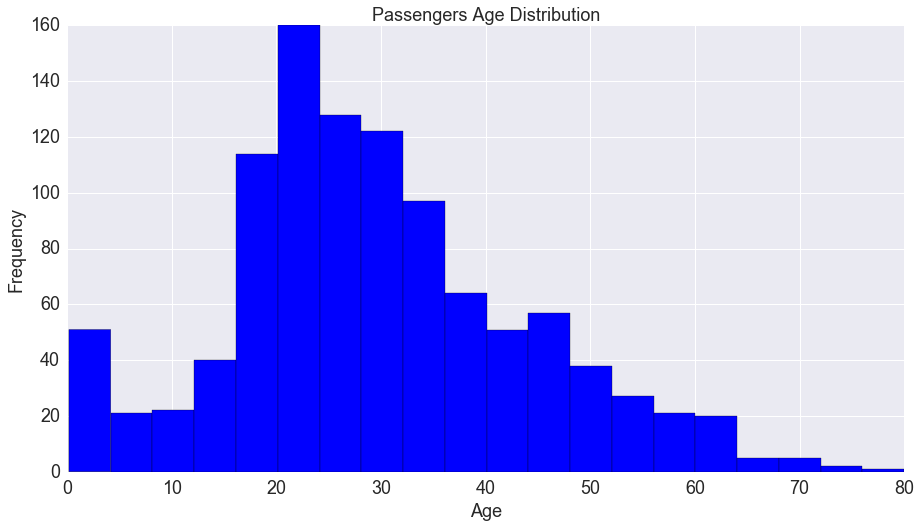

In [146]:
titanic.hist(column='age', figsize=(15,8), bins=20, color = 'blue') 
plt.title('Passengers Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)


From the histogram above, we see that ages between 20 and 30 are the most common ages, so filling in the missing values with a central number like the median is not a very bad idea. 
Let's fill in the missing values with the median. 

In [147]:
#caluculate the median of the age attribute
titanic["age"].median()

28.0

In [148]:
#Replacing NaN values with the median value 28..  
median_age = np.where(titanic["age"].isnull(), 28, titanic["age"])    
titanic["age"] = median_age
titanic["age"].describe()

count    1309.000000
mean       29.503183
std        12.905246
min         0.166700
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: age, dtype: float64

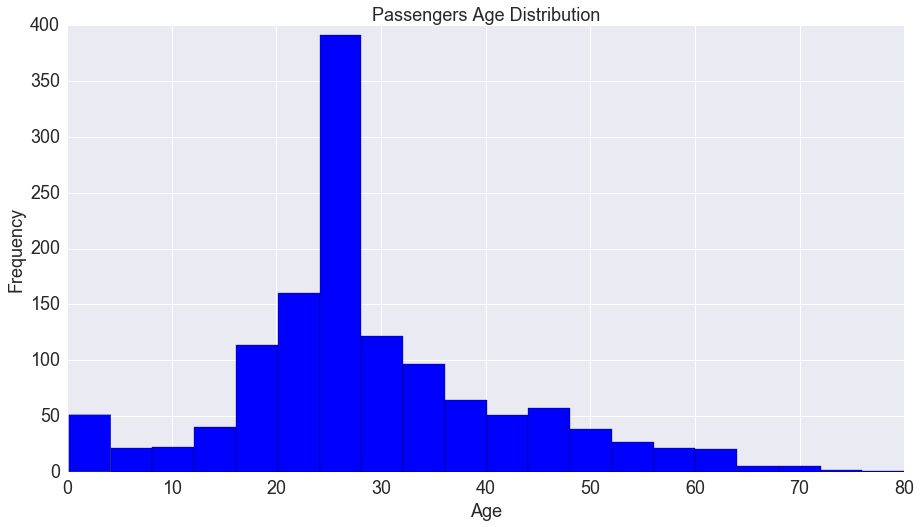

In [149]:
# now let's see the new age distribution
titanic.hist(column='age', figsize=(15,8), bins=20, color = 'blue')  
plt.title('Passengers Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

Not very bad! for the purpose of this homework we believe that this is fine.. However, when work with a real model we can test and see the effect of such a decision and then adjuct accordingly! 

In [150]:
#fare attribute
titanic["fare"].describe()

/Users/Ray/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%              NaN
50%              NaN
75%              NaN
max       512.329200
Name: fare, dtype: float64

*Above basic results show that there are some missing values!!

let's find out what rows has a missing fare value..

In [151]:
#check how many observation has a missing fare
titanic["fare"].isnull().sum()


1

In [152]:
#let's find out which row
titanic[titanic.fare.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN


This is the only passenger with missing fare value, and interstingly by looking up his name online at https://www.encyclopedia-titanica.org/titanic-victim/thomas-storey.html we find that his job was a Seaman so it makes sence to assume that this guy has 0 fare and based on this assumption we will fill the missing fare value with zaro.



In [153]:
#Since Mr. Thomas is the only one with NaN fare value we will do the following 
new_fare = np.where(titanic["fare"].isnull(), 0, titanic["fare"])    
titanic["fare"] = new_fare
titanic["fare"].describe()

count    1309.000000
mean       33.270043
std        51.747063
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

Another thing that we noticed from the basic statistics above is that there are some people with values of zaro in the fare attribute. 


In [154]:
titanic[titanic['fare']==0].shape

(18, 14)

In [155]:
titanic[titanic['fare']==0]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,NaN,NaN,"Belfast, NI"
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,28.0,0,0,112051,0.0,NaN,S,NaN,NaN,"Liverpool, England / Belfast"
125,1,0,"Fry, Mr. Richard",male,28.0,0,0,112058,0.0,B102,S,NaN,NaN,NaN
150,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,NaN,110.0,NaN
170,1,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,C,NaN,Liverpool
223,1,0,"Parr, Mr. William Henry Marsh",male,28.0,0,0,112052,0.0,NaN,S,NaN,NaN,Belfast
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,NaN,NaN,"Rotterdam, Netherlands"
363,2,0,"Campbell, Mr. William",male,28.0,0,0,239853,0.0,NaN,S,NaN,NaN,Belfast
384,2,0,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,239853,0.0,NaN,S,NaN,NaN,Belfast
410,2,0,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0,NaN,S,NaN,NaN,Belfast


By looking at some of them online, intrestingly we found that some of them were seamen and others Fitter workin on the ship. and others like "Reuchlin, Jonkheer. John George" and intrestingly, by looking at https://www.encyclopedia-titanica.org/titanic-victim/johan-george-reuchlin.html we find that "John George" was holding a complementary tickets because of his position with the Holland America Line so it explains why there is a zero in the vlaue of the fare attribute.
so it makes since that the fare is 0.


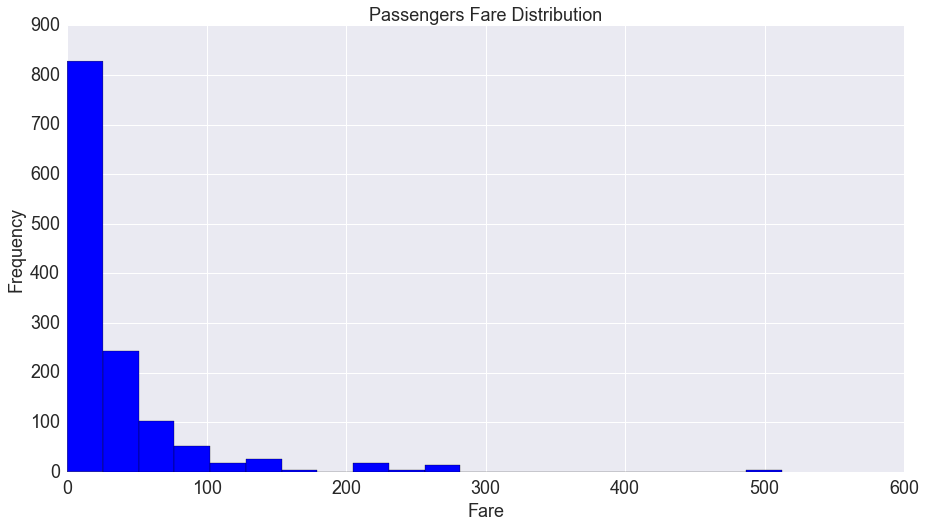

In [156]:
#looking at the fare distribution
titanic.hist(column='fare', figsize=(15,8), bins= 20, color = 'blue')
plt.title('Passengers Fare Distribution', fontsize=18)
plt.xlabel('Fare', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

we can clearly see that, the majority of the passengers paid an amount between 0-50.. and also we found that there were some outliers who paid way more then that.. 

We use boxplot to have a better look at thoso outliers..

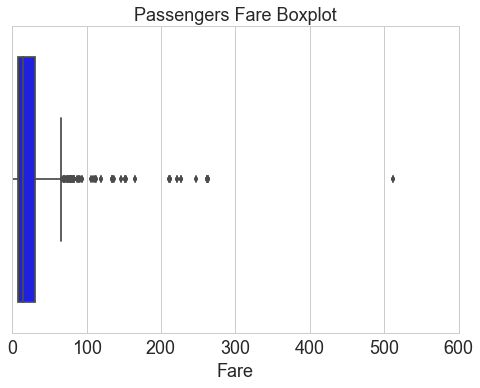

In [157]:
#boxplot - fare..
sns.set_style("whitegrid")
sns.boxplot(titanic.fare, color = 'blue')
plt.rcParams['figure.figsize']=10,5
plt.title('Passengers Fare Boxplot', fontsize=18)
plt.xlabel('Fare', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

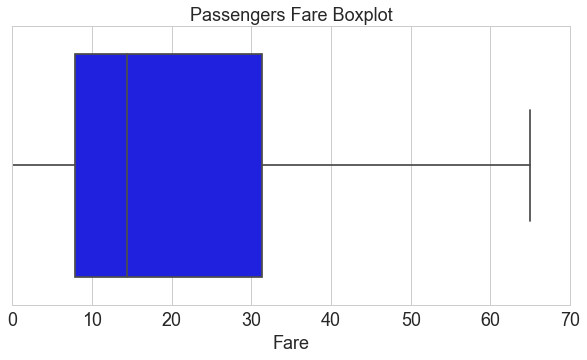

In [158]:
#boxplot without outliers..
sns.boxplot(titanic.fare, showfliers=False, color = 'blue')
plt.rcParams['figure.figsize']=10,5
plt.title('Passengers Fare Boxplot', fontsize=18)
plt.xlabel('Fare', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

In [159]:
#show the passenger who paid more than
titanic[titanic['fare']>300]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN


Looking at "Mr Thomas Drake Martinez Cardeza" online, we found that he and his mother They occupied one of the two most luxurious suites on board.. 
https://www.encyclopedia-titanica.org/titanic-survivor/thomas-cardeza.html


In [160]:
#survived attribute 
titanic.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

In [161]:
#making sure no missing data 
titanic[titanic.survived.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


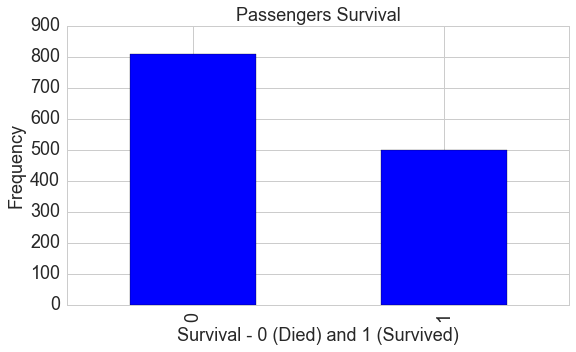

In [162]:
#plot survived
titanic.survived.value_counts().plot(kind='bar',color = 'blue',figsize=(9,5))
plt.title('Passengers Survival', fontsize=18)
plt.xlabel('Survival - 0 (Died) and 1 (Survived)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)


In [163]:
#persentage of passengers that have survived and who have not..
titanic.survived.value_counts()/titanic.survived.count()*100

0    61.802903
1    38.197097
Name: survived, dtype: float64

~62% died and ~ 38% survived --- More passengers died than survived!

In [164]:
#sex attribute 
titanic.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

In [165]:
#making sure no missing data 
titanic[titanic.sex.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


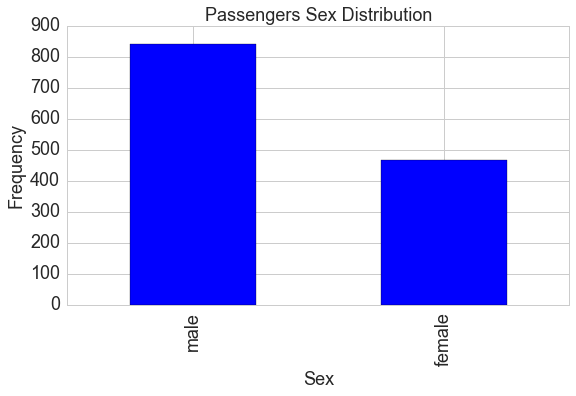

In [166]:
titanic.sex.value_counts().plot(kind='bar',color = 'blue',figsize=(9,5))
plt.title('Passengers Sex Distribution', fontsize=18)
plt.xlabel('Sex', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)


In [167]:
#persentage of females and males..
titanic.sex.value_counts()/titanic.sex.count()*100

male      64.400306
female    35.599694
Name: sex, dtype: float64

~64% males and ~36% females --- male passengers are more than female passengers

In [168]:
#pclass attribute 
titanic.pclass.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [169]:
#making sure no missing data 
titanic[titanic.pclass.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


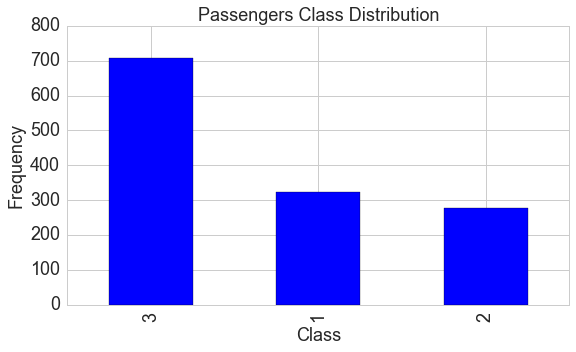

In [170]:
titanic.pclass.value_counts().plot(kind='bar', color = 'blue',figsize=(9,5))
plt.title('Passengers Class Distribution', fontsize=18)
plt.xlabel('Class', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)


In [171]:
#persentage of each class..
titanic.pclass.value_counts()/titanic.pclass.count()*100

3    54.163484
1    24.675325
2    21.161192
Name: pclass, dtype: float64

class1 -> ~25% .. class2 -> 21% .. class3 -> 54%

The majority of the passengers are traveling on the 3rd class.. we can assume that most of the passengers have a limited budget, maybe!

In [172]:
#home.dest attribute 

In [173]:
titanic['home.dest'].describe()


count              745
unique             369
top       New York, NY
freq                64
Name: home.dest, dtype: object

In [174]:
#check missing data 
titanic[titanic['home.dest'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,6,NaN,NaN
18,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,8,NaN,NaN
23,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,4,NaN,NaN
24,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,8,NaN,NaN
28,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S,8,NaN,NaN
44,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E40,C,3,NaN,NaN
46,1,0,"Cairns, Mr. Alexander",male,28.0,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
66,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C,4,NaN,NaN
73,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S,11,NaN,NaN
88,1,1,"Daniels, Miss. Sarah",female,33.0,0,0,113781,151.5500,NaN,S,8,NaN,NaN


In [175]:
#check the most common values for home.dest attribute
#assuming the format of (Home/Destination)
titanic['home.dest'].value_counts()

New York, NY                                          64
London                                                14
Montreal, PQ                                          10
Paris, France                                          9
Cornwall / Akron, OH                                   9
Winnipeg, MB                                           8
Philadelphia, PA                                       8
Wiltshire, England Niagara Falls, NY                   8
Brooklyn, NY                                           7
Sweden Winnipeg, MN                                    7
Belfast                                                7
Sweden Worcester, MA                                   5
Somerset / Bernardsville, NJ                           5
Bulgaria Chicago, IL                                   5
Rotherfield, Sussex, England Essex Co, MA              5
Ottawa, ON                                             5
Haverford, PA / Cooperstown, NY                        5
Ireland New York, NY           

The result above shows that, the most common value for this column is "New York, NY" with 64 occurrences and the second top is "london", and so on.. its clear that New York, NY is a destination however using only this dataset it's hard to tell about the rest.. but the result above gives some idea..

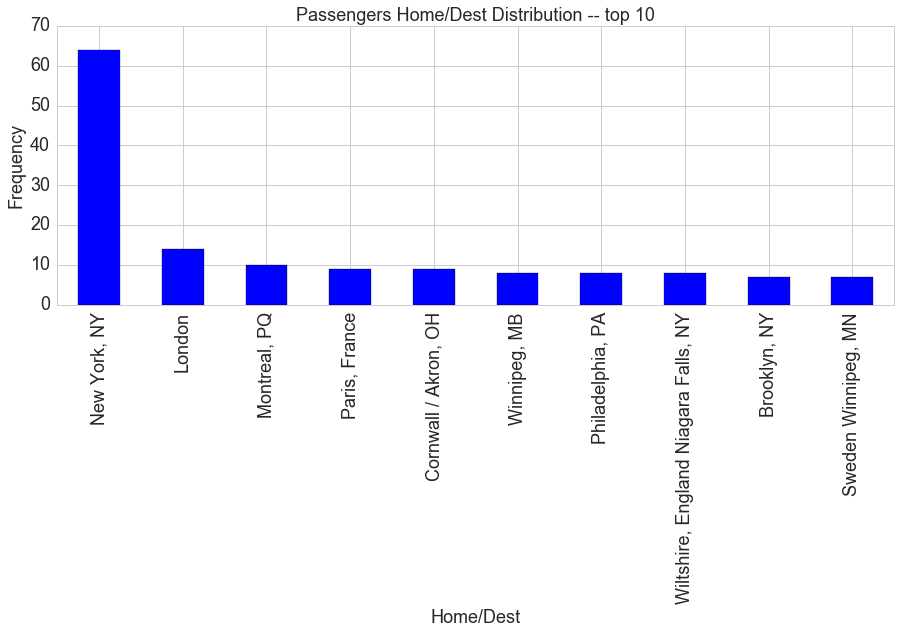

In [176]:
#plot of the top 10 most frequent value of home/dest
titanic['home.dest'].value_counts().head(10).plot(kind='bar', color = 'blue',figsize=(15,5))
plt.title('Passengers Home/Dest Distribution -- top 10', fontsize=18)
plt.xlabel('Home/Dest', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)


In [177]:
#sibsp attribute 
titanic['sibsp'].describe()


count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: sibsp, dtype: float64

In [178]:
#check missing data 

titanic[titanic.sibsp.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


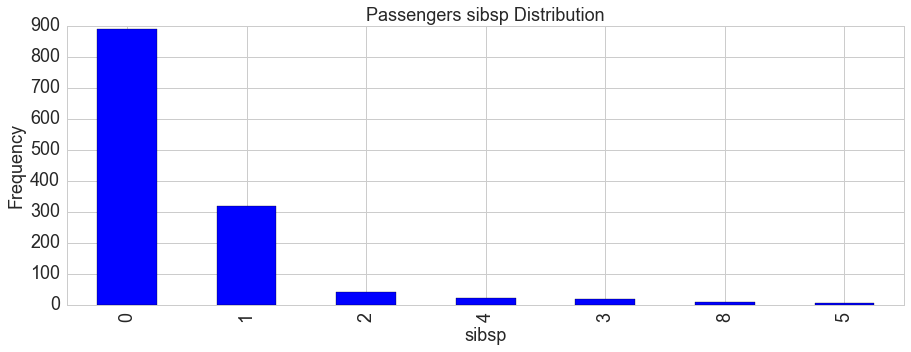

In [179]:
titanic.sibsp.value_counts().plot(kind='bar', color = 'blue',figsize=(15,5))
plt.title('Passengers sibsp Distribution', fontsize=18)
plt.xlabel('sibsp', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

In [180]:
titanic.sibsp.value_counts()/titanic.sibsp.count()*100

0    68.067227
1    24.369748
2     3.208556
4     1.680672
3     1.527884
8     0.687548
5     0.458365
Name: sibsp, dtype: float64

The result above shows that ~68% of the passengers traveled on the ship without any siblings or spouse.. and ~24% traveled on the ship with only one sibling or spouse. and only ~3% of them was on the ship with 2 siblings or spouse. 
the other persentage of the freqs of sib/spouse can be seen above.

In [181]:
#parch attribute 
titanic['parch'].describe()

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: parch, dtype: float64

In [182]:
#check missing data 
titanic[titanic.parch.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


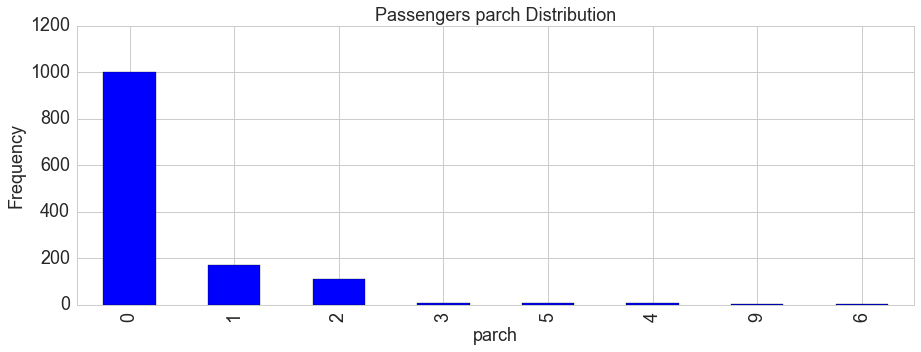

In [183]:
titanic.parch.value_counts().plot(kind='bar', color = 'blue',figsize=(15,5))
plt.title('Passengers parch Distribution', fontsize=18)
plt.xlabel('parch', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
#check whar parch is..

In [184]:
titanic.parch.value_counts()/titanic.parch.count()*100

0    76.546982
1    12.987013
2     8.632544
3     0.611154
5     0.458365
4     0.458365
9     0.152788
6     0.152788
Name: parch, dtype: float64

The result above shows that ~76% of the passengers traveled on the ship without any parents or children.. and ~12% traveled on the ship with only one parent or a child. and only ~8% of them was on the ship with 2 parents or children. 
the other persentage of the freq of parent/child is above.

The results from analysing the parch and sibsp suggest that the majority of the passengers traveled alone!

In [185]:
#cabin attribute 
titanic['cabin'].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: cabin, dtype: object

In [186]:
#check missing values
titanic[titanic.cabin.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,6,NaN,NaN
15,1,0,"Baumann, Mr. John D",male,28.0,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
23,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,4,NaN,NaN
25,1,0,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,NaN,148.0,"San Francisco, CA"
35,1,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C,4,NaN,"Cooperstown, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,28.0,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,28.0,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,28.0,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
48,1,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",female,53.0,0,0,PC 17606,27.4458,NaN,C,6,NaN,"Washington, DC"


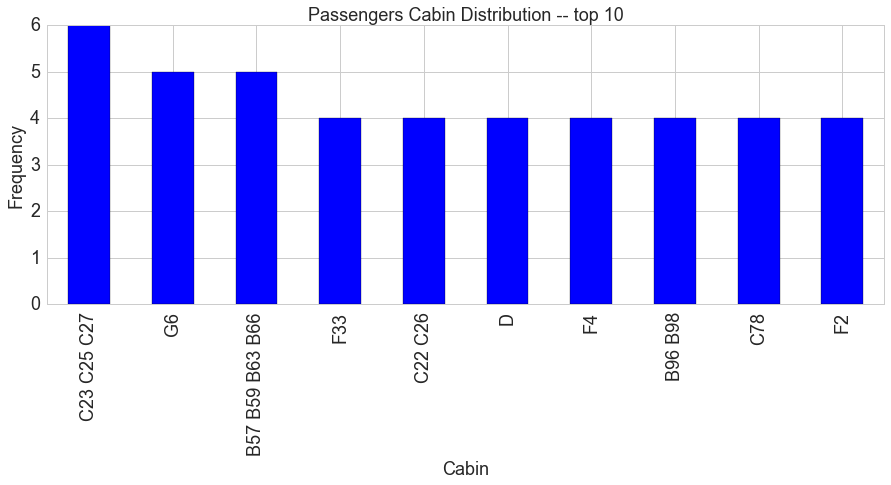

In [187]:
titanic['cabin'].value_counts().head(10).plot(kind='bar', color = 'blue',figsize=(15,5))
plt.title('Passengers Cabin Distribution -- top 10', fontsize=18)
plt.xlabel('Cabin', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

The result above shows that there are 1014 passenger with missing cabin code.

It might be the case that most passengers did not stay in a cabin.


so to fill in these missing falue we will go with the assumption that passengers with NaN value in the cabon attribute are those with no cabin and we will put a value of 'none' instead. This is our assumption and might not be the best correct fix for this!



In [188]:
new_cabin = np.where(titanic["cabin"].isnull(), "none", titanic["cabin"])    
titanic["cabin"] = new_cabin
titanic["cabin"].describe()

count     1309
unique     187
top       none
freq      1014
Name: cabin, dtype: object

In [189]:
#looking at the top 10 values 
titanic['cabin'].value_counts().head(10)

none               1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
F4                    4
D                     4
F2                    4
B96 B98               4
C22 C26               4
Name: cabin, dtype: int64

In [190]:
#embarked attribute
titanic['embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [191]:
#check missing values 
titanic[titanic.embarked.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


One assumption way to quickly fix the missing value problem is to look at the distribution of the embaraked values.. and find the most comon value and assign it to the rows with missing values.. for example we could assign "S" to both passengers from the plot below! 

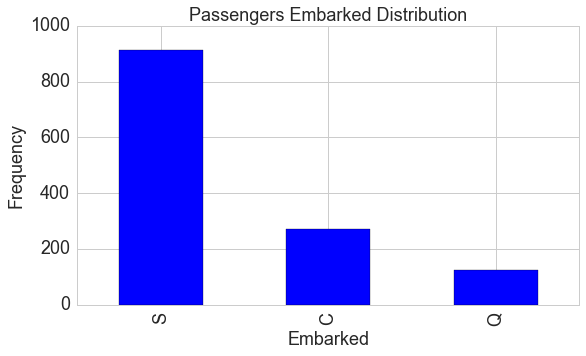

In [192]:
titanic.embarked.value_counts().plot(kind='bar', color = 'blue',figsize=(9,5))
plt.title('Passengers Embarked Distribution', fontsize=18)
plt.xlabel('Embarked', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

However, by looking at the name of "Icard, Miss. Amelie" and "Stone, Mrs. George Nelson (Martha Evelyn)" online we interstingly find that they both boarded on the same ticket number and embarked from Southampton Southampton "Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28." 

So based on that we will replace the missing value with S => Southampton. 

In [193]:
new_embarked = np.where(titanic["embarked"].isnull(), "S", titanic["embarked"])    
titanic["embarked"] = new_embarked
titanic["embarked"].describe()

count     1309
unique       3
top          S
freq       916
Name: embarked, dtype: object

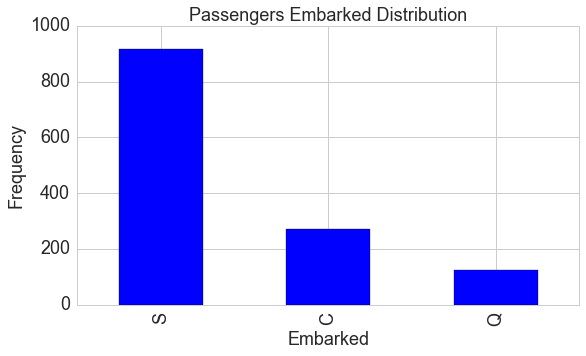

In [194]:
titanic.embarked.value_counts().plot(kind='bar', color = 'blue',figsize=(9,5))
plt.title('Passengers Embarked Distribution', fontsize=18)
plt.xlabel('Embarked', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

In [195]:
titanic.embarked.value_counts()/titanic.embarked.count()*100

S    69.977082
C    20.626432
Q     9.396486
Name: embarked, dtype: float64

The result above shows that ~70% of the passengers embarked from "S".. and ~20% embarked from "C".. and ~9% embarked from "Q"  

In [196]:
#make sure that we assigned the correct values
titanic[titanic['name']=='Icard, Miss. Amelie']


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S,6,NaN,NaN


In [197]:
titanic[titanic['name']=='Stone, Mrs. George Nelson (Martha Evelyn)']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S,6,NaN,"Cincinatti, OH"


Perfect!

In [198]:
#boat attribute 
titanic['boat'].describe()


count     486
unique     28
top        13
freq       39
Name: boat, dtype: object

In [199]:
#checking missing data
titanic[titanic.boat.isnull()]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,none,C,NaN,22.0,"Montevideo, Uruguay"
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY"
15,1,0,"Baumann, Mr. John D",male,28.0,0,0,PC 17318,25.9250,none,S,NaN,NaN,"New York, NY"
16,1,0,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,NaN,NaN,"Montreal, PQ"
25,1,0,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,none,C,NaN,148.0,"San Francisco, CA"
30,1,0,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S,NaN,NaN,"Trenton, NJ"


we have 823 rows with missing boat values

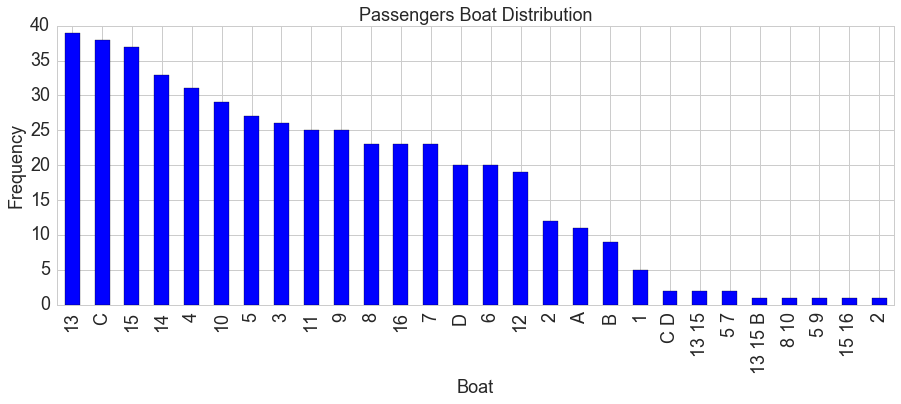

In [200]:
titanic['boat'].value_counts().plot(kind='bar', color = 'blue',figsize=(15,5))
plt.title('Passengers Boat Distribution', fontsize=18)
plt.xlabel('Boat', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

Boats can have number such as 13, letter such as C, or both such as 1315B 

In [201]:
#top 5 most frequent boats
titanic.boat.value_counts().head(5)

13    39
C     38
15    37
14    33
4     31
Name: boat, dtype: int64

In [202]:
#top 5 most frequent boats (persentage)
titanic.boat.value_counts().head(5)/titanic.boat.count()*100

13    8.024691
C     7.818930
15    7.613169
14    6.790123
4     6.378601
Name: boat, dtype: float64

In [203]:
#body attribute 
titanic['body'].describe()


/Users/Ray/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    121.000000
mean     160.809917
std       97.696922
min        1.000000
25%             NaN
50%             NaN
75%             NaN
max      328.000000
Name: body, dtype: float64

In [204]:
#checking missing data
titanic[titanic.body.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0000,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY"
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0000,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France"


In [205]:
titanic['body'].value_counts().head(10)

328.0    1
153.0    1
75.0     1
79.0     1
80.0     1
81.0     1
89.0     1
96.0     1
97.0     1
98.0     1
Name: body, dtype: int64

we have 1188 rows missing the body value

In [206]:
#ticket attribute 
titanic['ticket'].describe()

count         1309
unique         939
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [207]:
#checking missing data
titanic[titanic.ticket.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [208]:
#top 10 most frequent Tickets
titanic['ticket'].value_counts().head(10)

CA. 2343        11
CA 2144          8
1601             8
3101295          7
347082           7
347077           7
S.O.C. 14879     7
PC 17608         7
347088           6
113781           6
Name: ticket, dtype: int64

Our assumption here is that more than one passenger shared the same ticket number!

###### 2. Use the `groupby` method to calculate the proportion of passengers that survived by sex.

Solution:


In [209]:
sex_grouped=titanic.groupby('sex')
sex_grouped.describe()

/Users/Ray/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


age        body        fare       parch      pclass  \
sex                                                                        
female count  466.000000    8.000000  466.000000  466.000000  466.000000   
       mean    28.572067  166.625000   46.198097    0.633047    2.154506   
       std     13.300806  138.110657   63.292599    1.049579    0.866181   
       min      0.166700    7.000000    6.750000    0.000000    1.000000   
       25%     21.000000         NaN   10.504175    0.000000    1.000000   
       50%     28.000000         NaN   23.000000    0.000000    2.000000   
       75%     35.000000         NaN   55.331275    1.000000    3.000000   
       max     76.000000  328.000000  512.329200    9.000000    3.000000   
male   count  843.000000  113.000000  843.000000  843.000000  843.000000   
       mean    30.017892  160.398230   26.123575    0.247924    2.372479   
       std     12.659913   95.035289   42.471194    0.708938    0.811908   
       min      0.333300    1.000000    0.000000    0.000000    1.000000   
       25%     24.000000         NaN    7.864600    0.000000    2.000000   
       50%     28.000000         NaN   11.500000    0.000000    3.000000   
       75%     35.000000         NaN   26.550000    0.000000    3.000000   
       max     80.000000  322.000000  512.329200    9.000000    3.000000   

                   sibsp    survived  
sex                                   
female count  466.000000  466.000000  
       mean     0.652361    0.727468  
       std      1.101009    0.445741  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    1.000000  
       75%      1.000000    1.000000  
       max      8.000000    1.000000  
male   count  843.000000  843.000000  
       mean     0.413998    0.190985  
       std      0.997928    0.393310  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      1.000000    0.000000  
       max      8.000000    1.000000

In [210]:
sex_servived_group =sex_grouped.survived.sum()
sex_servived_group

sex
female    339
male      161
Name: survived, dtype: int64

In [211]:
#males proportion survived
df_male = titanic.survived[titanic.sex == 'male'].value_counts()
sex_servived_group.male/df_male.sum()*100

19.098457888493474

In [212]:
#female proportion survived
df_female = titanic.survived[titanic.sex == 'female'].value_counts()
sex_servived_group.female/df_female.sum()*100


72.746781115879827

In [213]:
b=titanic.sex.value_counts()

In [214]:
surviving_rate=sex_servived_group/b

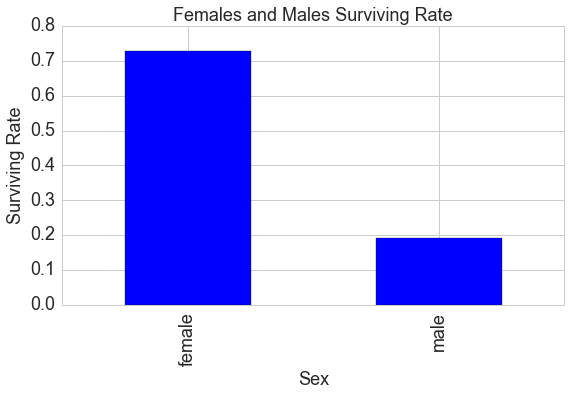

In [215]:
surviving_rate.plot(kind = 'bar', color = 'blue', figsize=(9,5))
plt.title('Females and Males Surviving Rate', fontsize=18)
plt.xlabel('Sex', fontsize=18)
plt.ylabel('Surviving Rate', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

The above result shows that 19.09% of males survived, and 72.74% of females survived and wecan clearly see that females had a very high servival rate in comparison with males.

###### 3. Calculate the same proportion, but by class and sex.

Solution:

In [216]:
group = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived)

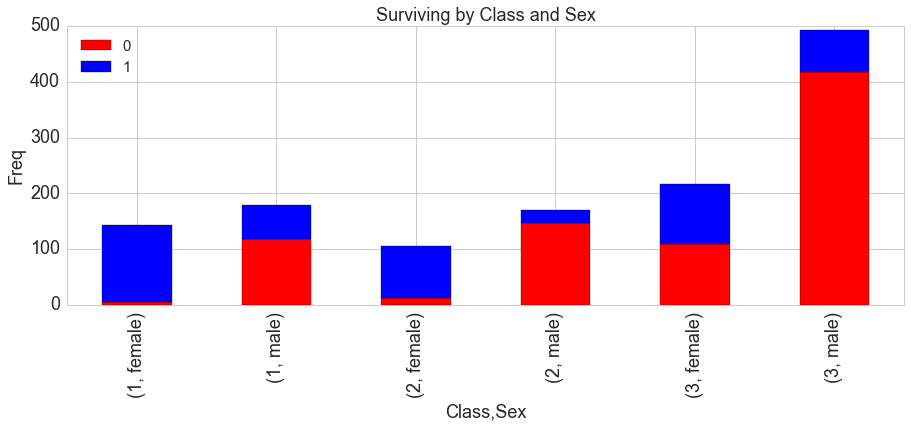

In [217]:
group.plot(kind = 'bar', stacked = True, color = ['red', 'blue'],figsize=(15,5))
plt.title('Surviving by Class and Sex', fontsize=18)
plt.xlabel('Class,Sex', fontsize=18)
plt.ylabel('Freq', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.legend(loc=2,prop={'size':15})

In [218]:
group

survived         0    1
pclass sex             
1      female    5  139
       male    118   61
2      female   12   94
       male    146   25
3      female  110  106
       male    418   75

In [219]:
# Here we want to flatten the dataframe above in order to make the proportion calculation easy for us!
flatten_1=group.reset_index()

In [220]:
#adding a new column => # of survived + # of died 
flatten_1['sum']=flatten_1[0]+flatten_1[1]

In [221]:
# adding a new column => for the proportion
flatten_1['proportion_of_passengers_surviving']=flatten_1[1]/flatten_1['sum']*100

In [222]:
flatten_1

survived,pclass,sex,0,1,sum,proportion_of_passengers_surviving
0,1,female,5,139,144,96.527778
1,1,male,118,61,179,34.078212
2,2,female,12,94,106,88.679245
3,2,male,146,25,171,14.619883
4,3,female,110,106,216,49.074074
5,3,male,418,75,493,15.212982


From the results above, the proportion of passennger survived by class and sex is:
- Class1 
  - Males   34.07%
  - Females 96.52%
- Class2 
  - Males   14.61%  
  - Females 88.67%
- Class3 
  - Males   15.21%
  - Females 49.07%
 


###### 4. Create age categories: children (under 14 years), adolescents (14-20), adult (21-64), and senior(65+), and calculate survival proportions by age category, class and sex.


Solution:

In [223]:
#possible solution is to define a new column and name it age_category and assign passengers to different categories based on their age 
titanic['age_category'] = ''
titanic['age_category'][titanic['age'] < 14] = 'children'
titanic['age_category'][(titanic['age'] >= 14) & (titanic['age'] <= 20)] = 'adolescents'
titanic['age_category'][(titanic['age'] > 20) & (titanic['age'] <= 64)] = 'adult'
titanic['age_category'][titanic['age'] > 64] = 'senior'

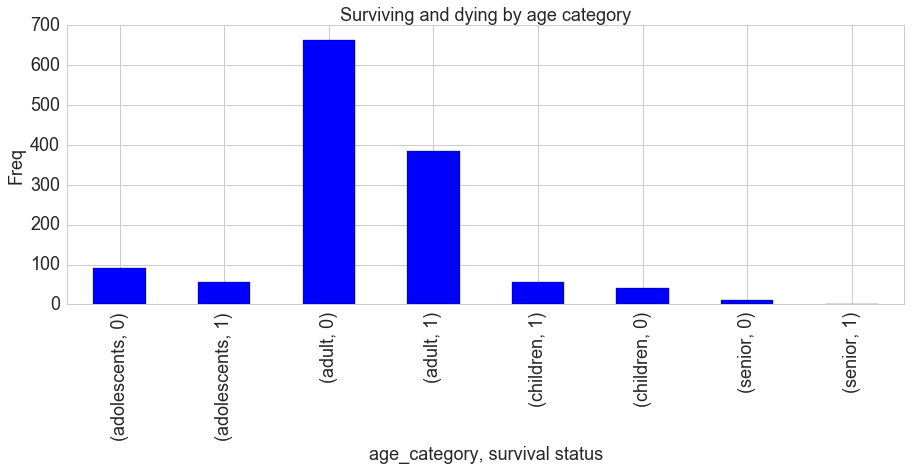

In [224]:
# quick look at the number of passengers that survived or died within each category
g =titanic.groupby('age_category').survived.sum()
g =titanic.groupby('age_category').survived.value_counts()
g.plot(kind='bar', color = 'blue',figsize=(15,5))
plt.title('Surviving and dying by age category', fontsize=18)
plt.xlabel('age_category, survival status', fontsize=18)
plt.ylabel('Freq', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

In [225]:
# Here we want to calculate survival proportions by age category, class and sex.
group_4 = pd.crosstab([titanic.pclass, titanic.sex, titanic.age_category ], titanic.survived)

In [226]:
group_4

survived                      0    1
pclass sex    age_category          
1      female adolescents     0   15
              adult           4  123
              children        1    0
              senior          0    1
       male   adolescents     4    1
              adult         108   54
              children        0    5
              senior          6    1
2      female adolescents     1   12
              adult          11   68
              children        0   14
       male   adolescents    15    2
              adult         129   12
              children        0   11
              senior          2    0
3      female adolescents    16   19
              adult          78   72
              children       16   15
       male   adolescents    56    8
              adult         334   55
              children       25   12
              senior          3    0

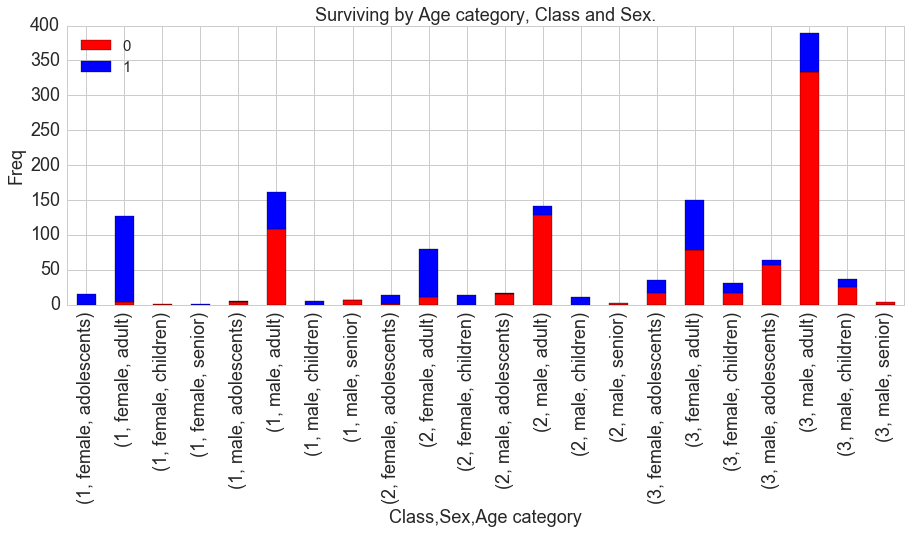

In [227]:
# look at what the survival numbers at a deep level! broken down by class, sex, and age_category!
group_4.plot(kind = 'bar', stacked = True, color = ['red', 'blue'],figsize=(15,5))
plt.title('Surviving by Age category, Class and Sex.', fontsize=18)
plt.xlabel('Class,Sex,Age category', fontsize=18)
plt.ylabel('Freq', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.legend(loc=2,prop={'size':15})



In [228]:
# Here we want to flatten the dataframe above in order to make the proportion calculation easy for us!
flatten=group_4.reset_index()

In [229]:
#adding a new column => # of survived + # of died 
flatten['sum']=flatten[0]+flatten[1]

In [230]:
# adding a new column => for the proportion
flatten['proportion_of_passengers_surviving']=flatten[1]/flatten['sum']*100

In [231]:
flatten

survived,pclass,sex,age_category,0,1,sum,proportion_of_passengers_surviving
0,1,female,adolescents,0,15,15,100.000000
1,1,female,adult,4,123,127,96.850394
2,1,female,children,1,0,1,0.000000
3,1,female,senior,0,1,1,100.000000
4,1,male,adolescents,4,1,5,20.000000
5,1,male,adult,108,54,162,33.333333
6,1,male,children,0,5,5,100.000000
7,1,male,senior,6,1,7,14.285714
8,2,female,adolescents,1,12,13,92.307692
9,2,female,adult,11,68,79,86.075949


From the results above, the proportion of passennger survived by class, age group, and sex is:
- Class1 
  - Males
      - seniors 14.28%
      - adults  33.33%
      - adolescents 20%
      - childrens 100%
  - Females 
      - seniors  100%
      - adults  96.85%
      - adolescents 100%
      - childrens 0%
- Class2 
  - Males
      - seniors  0%
      - adults  8.51%
      - adolescents  11.76%
      - childrens   100%
  - Females 
      - seniors none
      - adults  86.07%
      - adolescents 92.30%
      - childrens 100%
- Class3 
  - Males
      - seniors 0%
      - adults 14.13%
      - adolescents 12.50%
      - childrens 32.43%
  - Females
      - seniors none
      - adults 48%
      - adolescents 54.28%
      - childrens 48.38%


From the results above we can clearly see the idea of "Women and childrens first!"
also we can see that the proportion of females and childerin survived in Class3, is not as high as the proportion of females and childerin survived in Class2.. maybe passengers in Class2 have higher priority when it comes to being rescued than passengers in Class3. same thing applies to passengers in Class1 .. having the highest priority when it comes to being rescued.

The End!

## References

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) Wes McKinney